## Importing the libraries

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, average_precision_score
import joblib
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import numpy as np


## Data Acquisition & Description

In [ ]:
# Load the credit card transaction fraud detection data
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
## data divided into dependent and independent features
X = data.drop(['Class'],axis=1)
y = data.Class

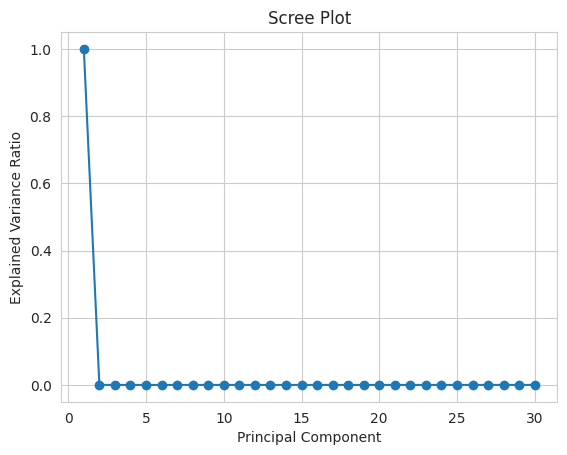

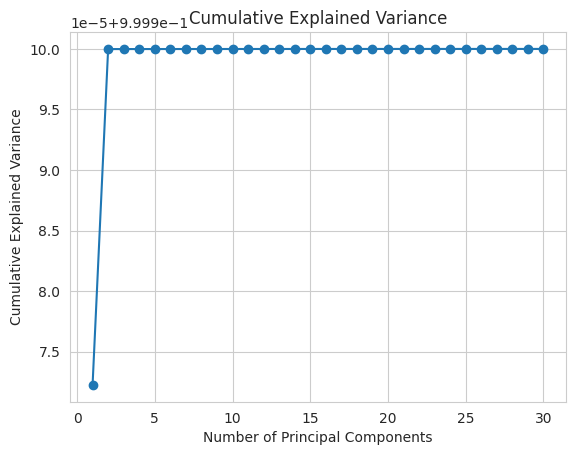

PCA = [[ 9.48138629e+04  5.59794671e+01  7.43237345e-01 ...  1.26700067e-01
  -2.14858047e-02  2.05262385e-02]
 [ 9.48138546e+04 -9.09536597e+01 -1.42895882e+00 ... -1.30074811e-02
   1.03172932e-03 -9.03447603e-03]
 [ 9.48128757e+04  2.85024840e+02  2.57569350e-01 ... -1.29493280e-01
  -2.23884515e-01 -9.65266068e-02]
 ...
 [-7.79741415e+04 -1.61186800e+01 -1.41070678e+00 ...  1.89969599e-02
  -7.73956962e-04  2.56966357e-02]
 [-7.79741447e+04 -7.39987151e+01  6.24927444e-01 ...  1.03256824e-01
   2.07836531e-02 -1.28061214e-01]
 [-7.79781331e+04  1.33004366e+02  6.33429876e-01 ... -6.40945935e-02
  -1.60044465e-01 -1.51396845e-01]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to the dataset
pca = PCA()
X_pca = pca.fit_transform(X)

# Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

# Print PCA point
print('PCA =', X_pca)

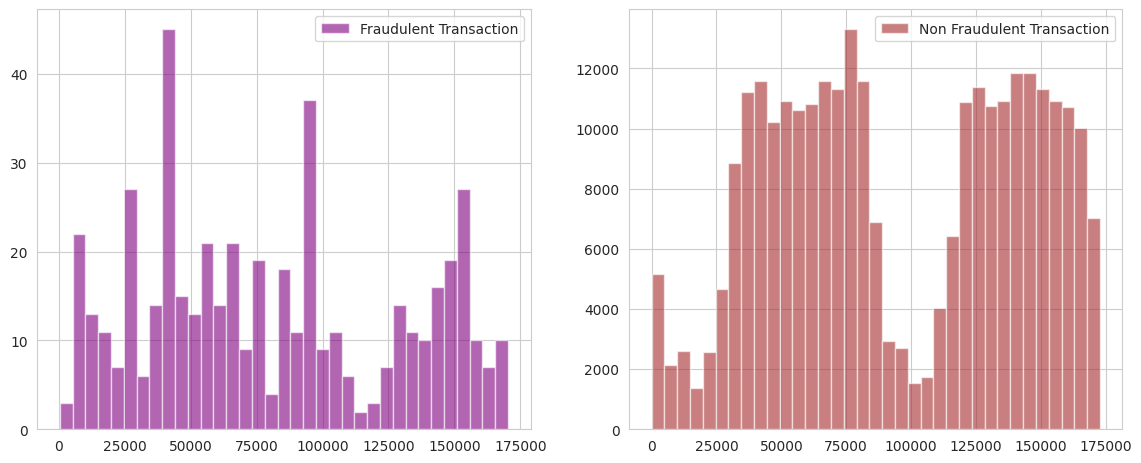

In [ ]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='purple', alpha=0.6, label="Fraudulent Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='brown', alpha=0.6, label="Non Fraudulent Transaction")
plt.legend()

In [ ]:
# data.shape
print('Shape of our Dataset -',data.shape)
data.head()

Shape of our Dataset - (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# data.columns
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Summary statistics
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# data.class
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Observations**

- We have 284807 Rows of observations having 31 columns.
- 'Class' is our Output feature indicating whether the transaction is fraudulent (1) or not (0).
- No missing values observed in our Dataset.
- dtype of all the features looks perfect.

## Data Preprocessing

In [ ]:
# data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# check for missing values in the dataset
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# duplicates check
data.duplicated().any()

True

**Observations**

- No missing values.
- No duplicates.
- dtype also looks fine.

## Exploratory Data Analysis

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

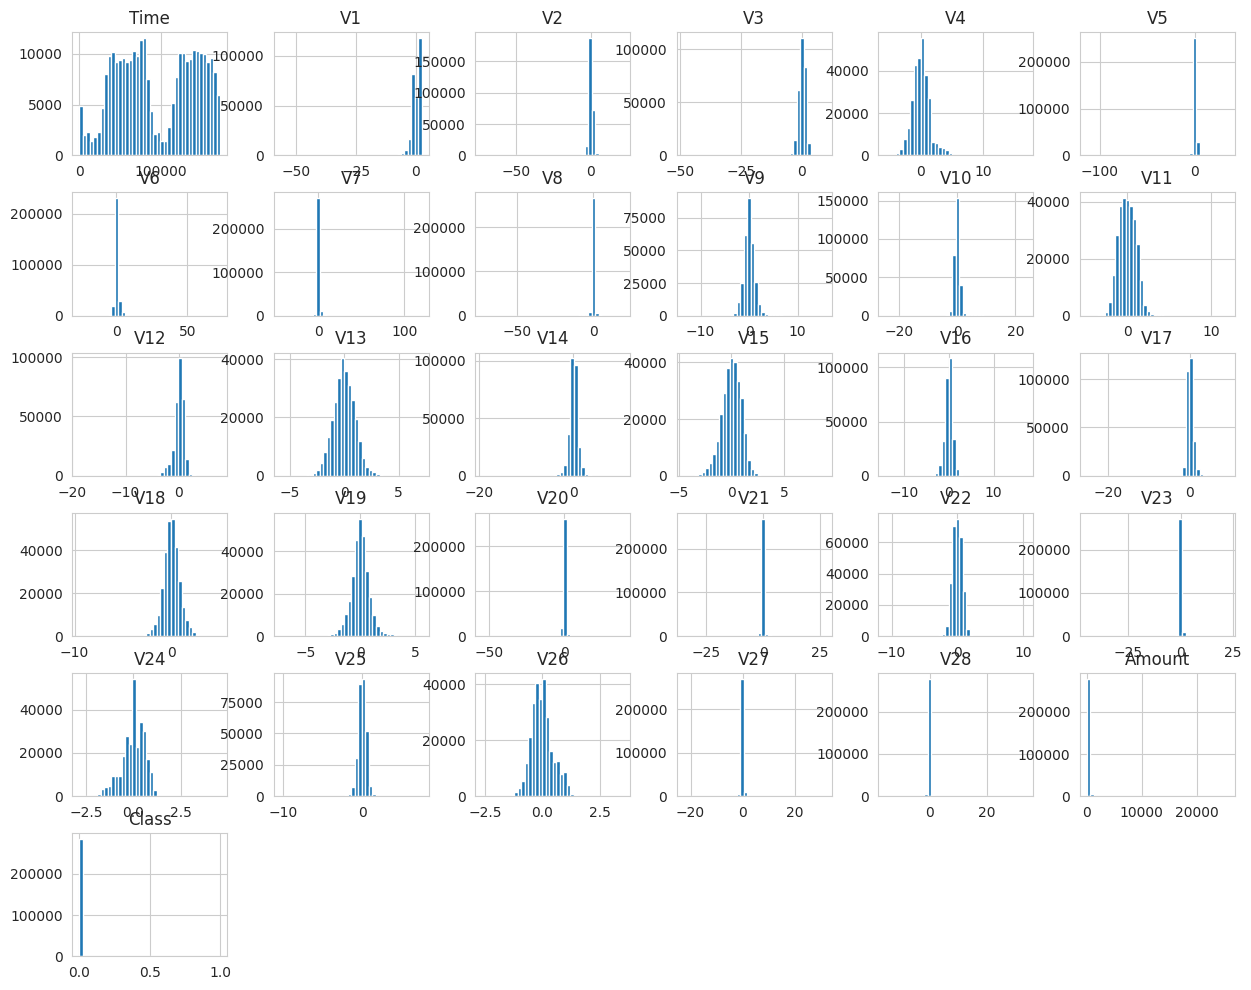

In [ ]:
# histogram
data.hist(bins=40, figsize=(15,12))

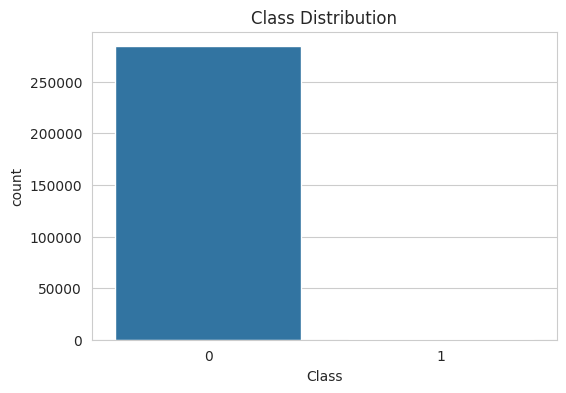

In [ ]:
# Class Distribution:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


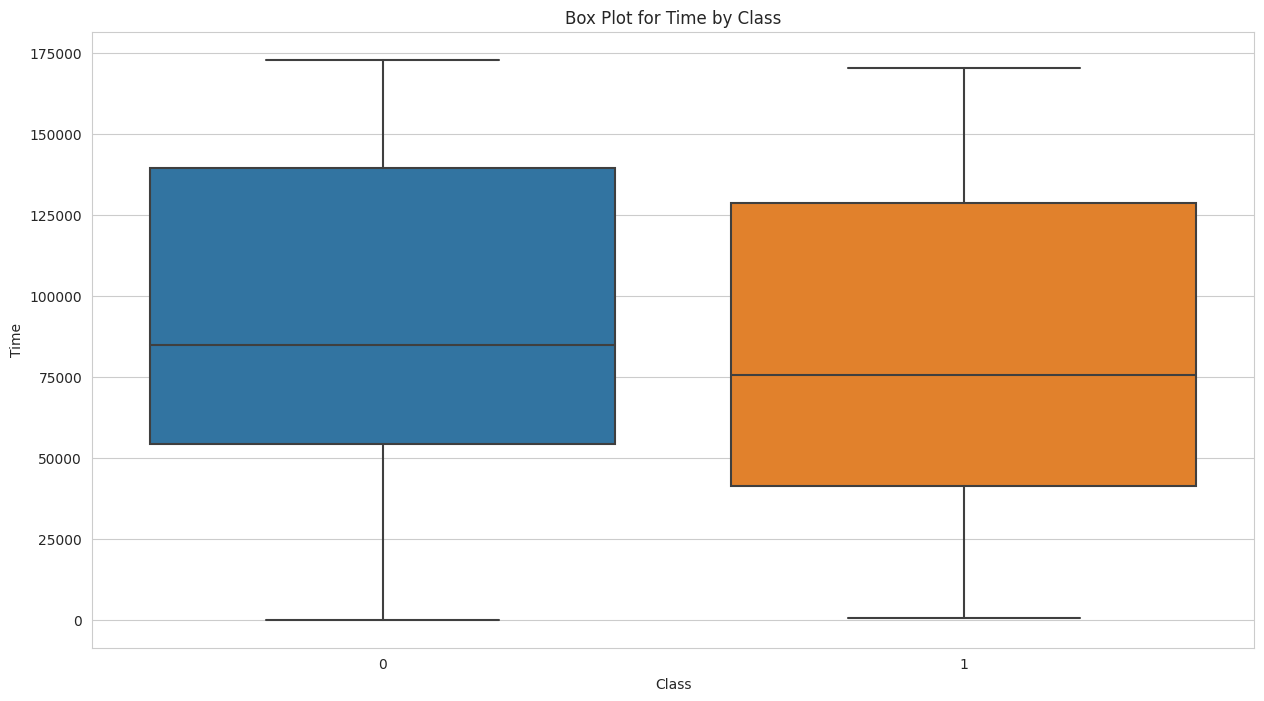

In [ ]:
#Box Plots for Fraud vs. Non-Fraud:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Class', y='Time', data=data)
plt.title('Box Plot for Time by Class')
plt.show()


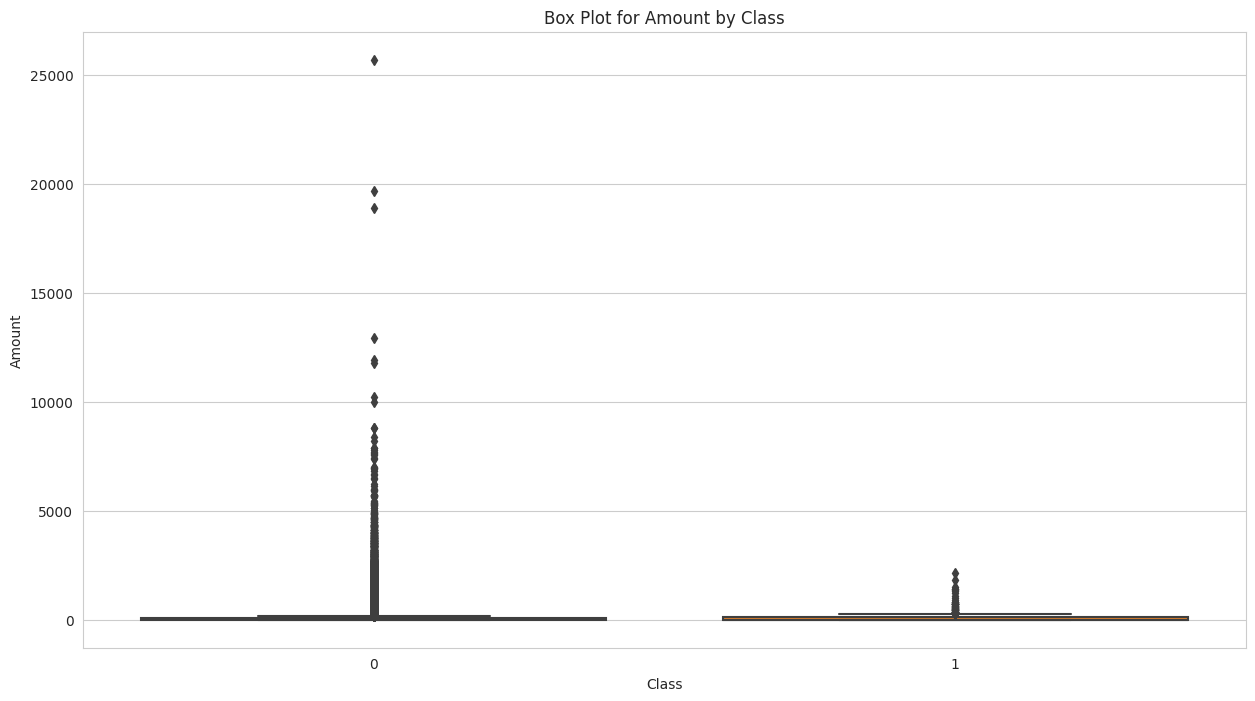

In [ ]:
#Box Plots for Fraud vs. Non-Fraud:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Box Plot for Amount by Class')
plt.show()

In [ ]:
# Determine the number of fraud and valid transactions in the entire dataset.
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


Text(0, 0.5, 'Frequency')

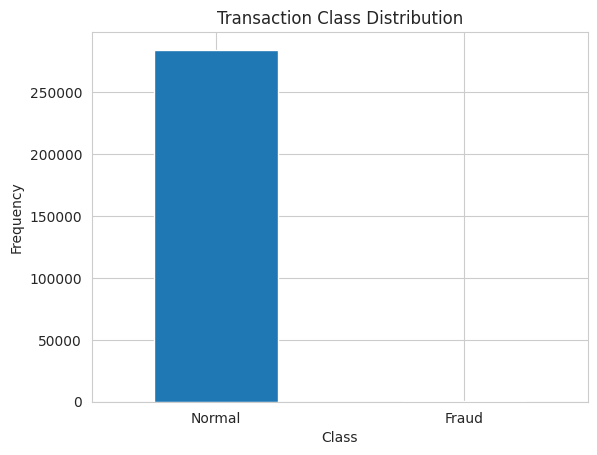

In [ ]:
# Transaction Class Distribution
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

**Observations**



**Observations**


In [ ]:
# the skewness of our features
data.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

**Observations**
- Time: -0.0356 (Close to 0, approximately symmetric)
- V1: -3.2807 (Moderate negative skewness)
- V2: -4.6249 (Moderate negative skewness)
- V3: -2.2402 (Moderate negative skewness)
- V4: 0.6763 (Moderate positive skewness)
- V5: -2.4259 (Moderate negative skewness)
- V6: 1.8266 (Moderate positive skewness)
- V7: 2.5539 (Moderate positive skewness)
- V8: -8.5219 (High negative skewness)
- V9: 0.5547 (Moderate positive skewness)
- V10: 1.1871 (Moderate positive skewness)
- V11: 0.3565 (Moderate positive skewness)
- V12: -2.2784 (Moderate negative skewness)
- V13: 0.0652 (Close to 0, approximately symmetric)
- V14: -1.9952 (Moderate negative skewness)
- V15: -0.3084 (Close to 0, approximately symmetric)
- V16: -1.1010 (Moderate negative skewness)
- V17: -3.8449 (Moderate negative skewness)
- V18: -0.2599 (Close to 0, approximately symmetric)
- V19: 0.1092 (Close to 0, approximately symmetric)
- V20: -2.0372 (Moderate negative skewness)
- V21: 3.5930 (Moderate positive skewness)
- V22: -0.2133 (Close to 0, approximately symmetric)
- V23: -5.8751 (Moderate negative skewness)
- V24: -0.5525 (Moderate negative skewness)
- V25: -0.4158 (Moderate negative skewness)
- V26: 0.5767 (Moderate positive skewness)
- V27: -1.1702 (Moderate negative skewness)
- V28: 11.1921 (High positive skewness)
- Amount: 16.9777 (High positive skewness)
- Class: 23.9976 (High positive skewness)
- We will see the distribution of some of these features.

In [ ]:
# the distribution of 'amount feature'
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


<Axes: >

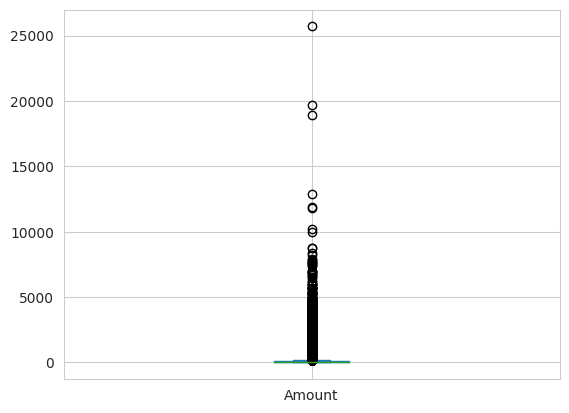

In [ ]:
# the distribution of 'amount feature'
data['Amount'].plot.box()

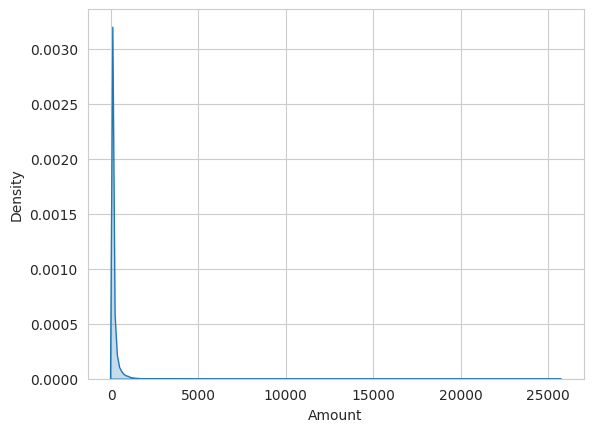

In [ ]:
sns.kdeplot(data=data['Amount'], fill=True)
plt.show()

**Observation**
- Amount is fairly Normally distributed.

In [ ]:
# the distribution of 'time feature'
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


<Axes: >

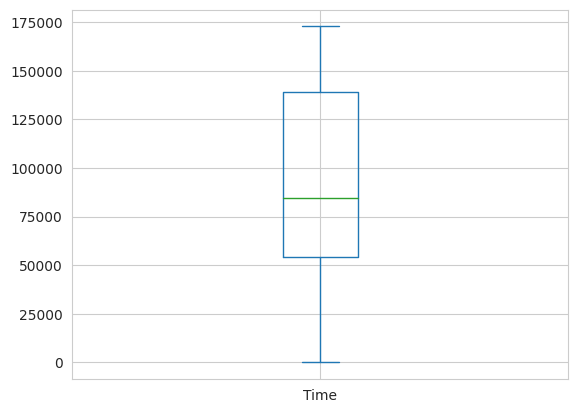

In [ ]:
# the distribution of 'time feature'
data['Time'].plot.box()

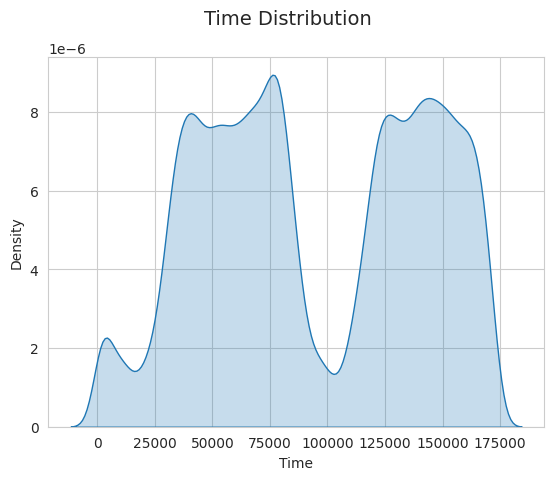

In [ ]:
sns.kdeplot(data=data['Time'], fill=True)
plt.suptitle('Time Distribution',size=14)
plt.show()

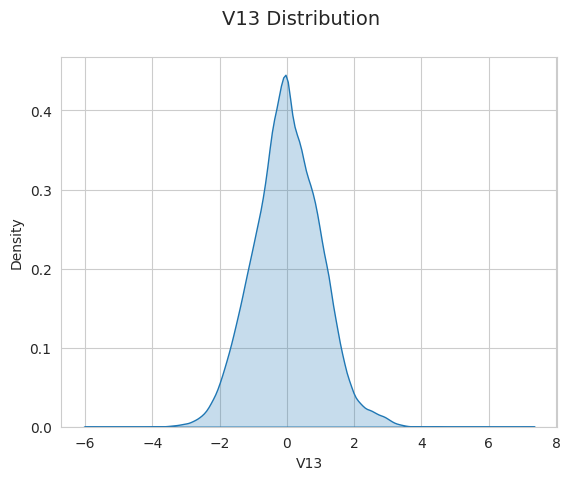

In [ ]:
sns.kdeplot(data=data['V13'], fill=True)
plt.suptitle('V13 Distribution',size=14)
plt.show()

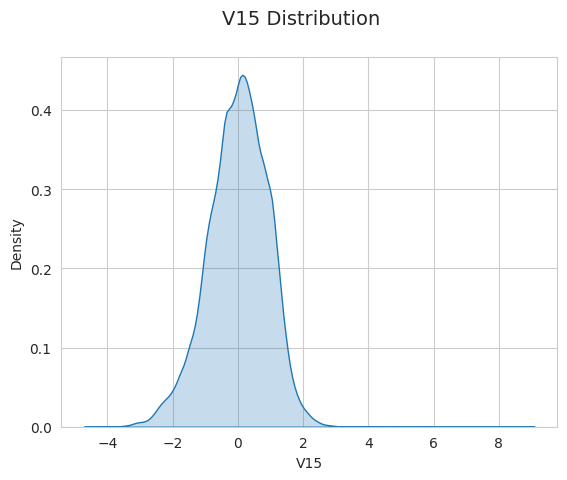

In [ ]:
sns.kdeplot(data=data['V15'], fill=True)
plt.suptitle('V15 Distribution',size=14)
plt.show()

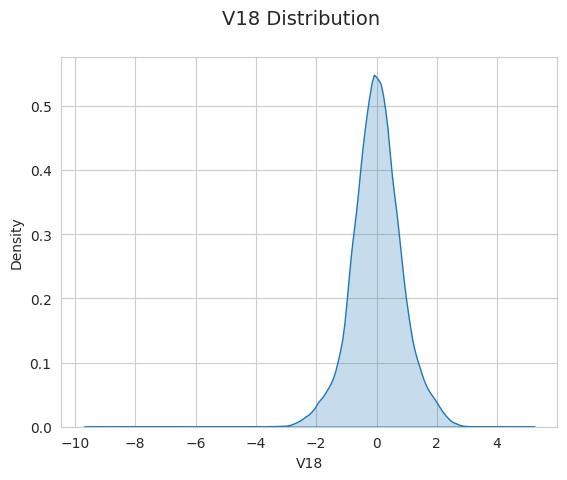

In [ ]:
sns.kdeplot(data=data['V18'], fill=True)
plt.suptitle('V18 Distribution',size=14)
plt.show()

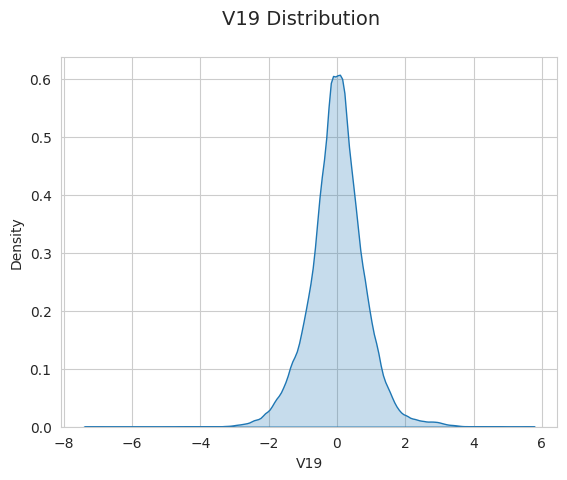

In [ ]:
sns.kdeplot(data=data['V19'], fill=True)
plt.suptitle('V19 Distribution',size=14)
plt.show()

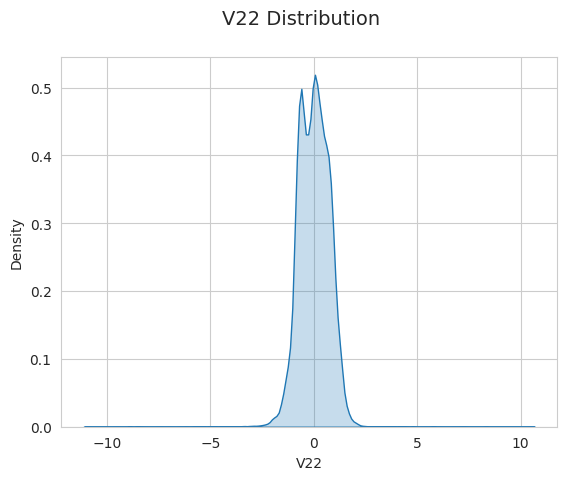

In [ ]:
sns.kdeplot(data=data['V22'], fill=True)
plt.suptitle('V22 Distribution',size=14)
plt.show()

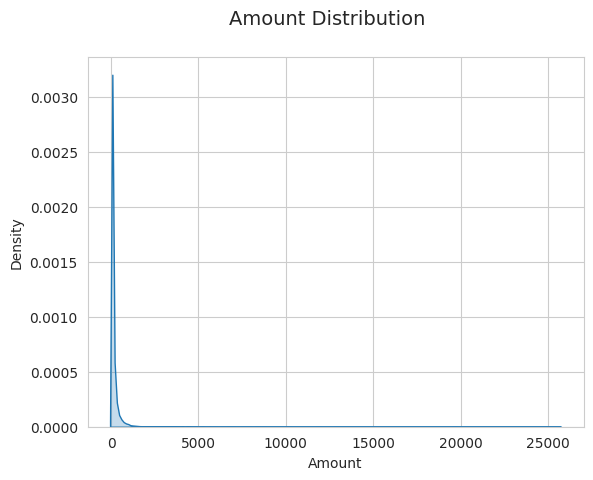

In [ ]:
sns.kdeplot(data=data['Amount'], fill=True)
plt.suptitle('Amount Distribution',size=14)
plt.show()

**Observation**
- Time is fairly Normally distributed.

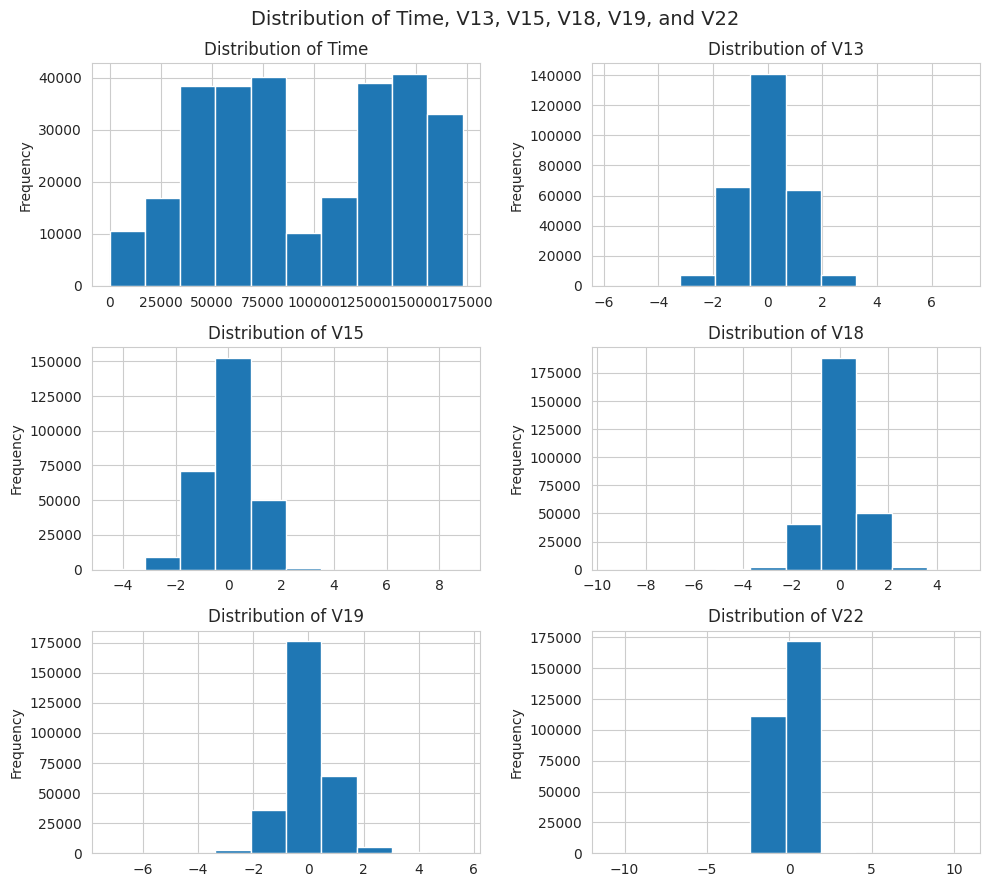

In [ ]:
# Features Time V13, V15, V18, V19, and V22
paper, axes = plt.subplots(3, 2, figsize=(10, 9))
data['Time'].plot(kind='hist', ax=axes[0, 0], title='Distribution of Time')
data['V13'].plot(kind='hist', ax=axes[0, 1], title='Distribution of V13')
data['V15'].plot(kind='hist', ax=axes[1, 0], title='Distribution of V15')
data['V18'].plot(kind='hist', ax=axes[1, 1], title='Distribution of V18')
data['V19'].plot(kind='hist', ax=axes[2, 0], title='Distribution of V19')
data['V22'].plot(kind='hist', ax=axes[2, 1], title='Distribution of V22')
plt.suptitle('Distribution of Time, V13, V15, V18, V19, and V22', size=14)
plt.tight_layout()
plt.show()


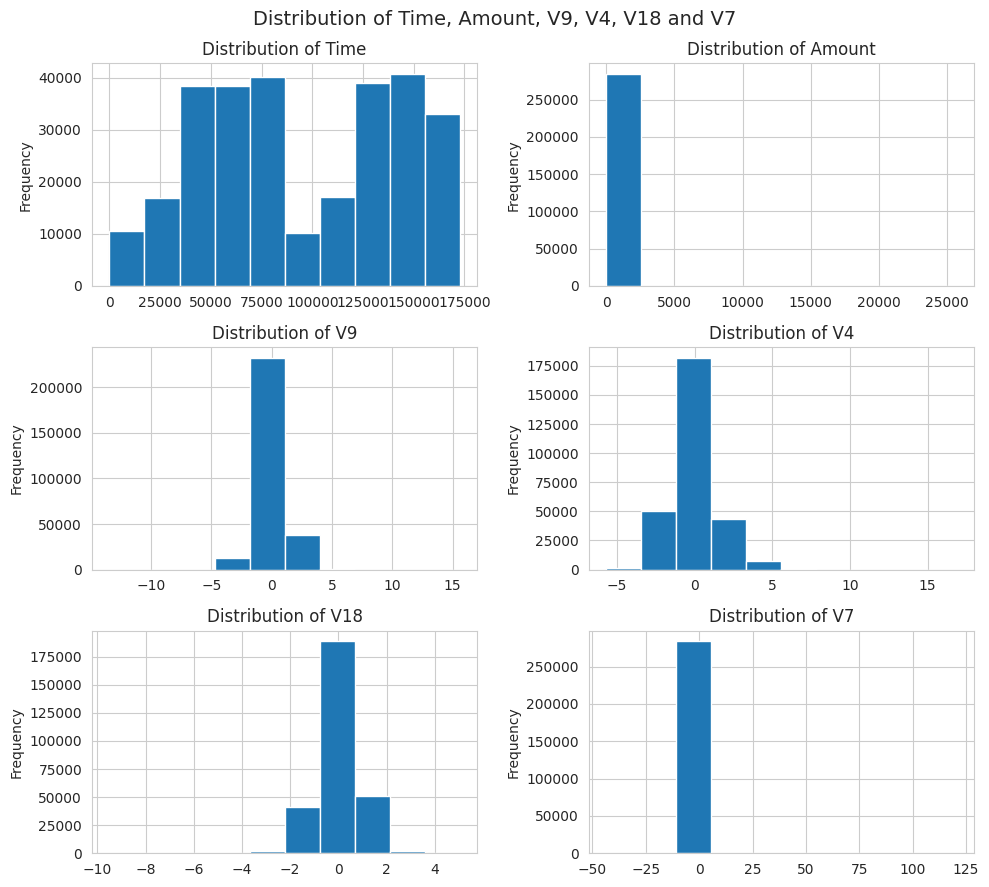

In [ ]:
# Features Time, Amount, V9, V4, V18 and V7
paper, axes = plt.subplots(3, 2, figsize=(10, 9))
data['Time'].plot(kind='hist', ax=axes[0, 0], title='Distribution of Time')
data['Amount'].plot(kind='hist', ax=axes[0, 1], title='Distribution of Amount')
data['V9'].plot(kind='hist', ax=axes[1, 0], title='Distribution of V9')
data['V4'].plot(kind='hist', ax=axes[1, 1], title='Distribution of V4')
data['V18'].plot(kind='hist', ax=axes[2, 0], title='Distribution of V18')
data['V7'].plot(kind='hist', ax=axes[2, 1], title='Distribution of V7')
plt.suptitle('Distribution of Time, Amount, V9, V4, V18 and V7', size=14)
plt.tight_layout()
plt.show()

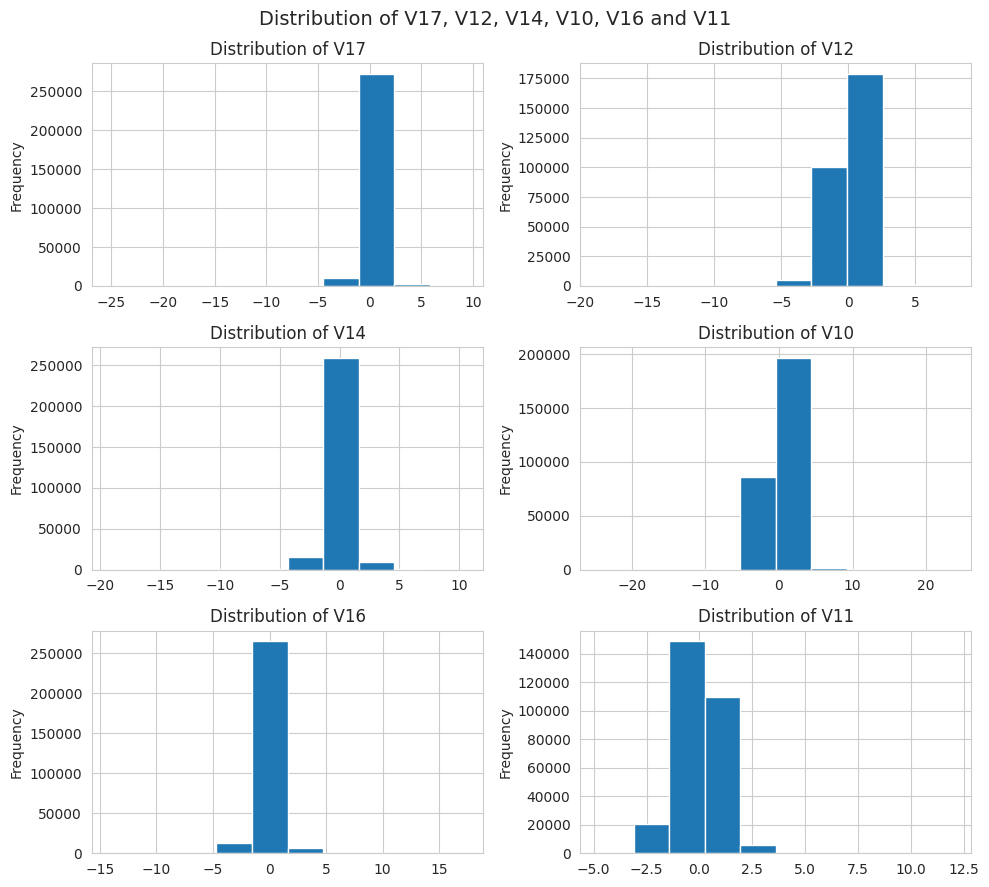

In [ ]:
# Features V17, V12, V14, V10, V16 and V11
paper, axes = plt.subplots(3, 2, figsize=(10, 9))
data['V17'].plot(kind='hist', ax=axes[0, 0], title='Distribution of V17')
data['V12'].plot(kind='hist', ax=axes[0, 1], title='Distribution of V12')
data['V14'].plot(kind='hist', ax=axes[1, 0], title='Distribution of V14')
data['V10'].plot(kind='hist', ax=axes[1, 1], title='Distribution of V10')
data['V16'].plot(kind='hist', ax=axes[2, 0], title='Distribution of V16')
data['V11'].plot(kind='hist', ax=axes[2, 1], title='Distribution of V11')
plt.suptitle('Distribution of V17, V12, V14, V10, V16 and V11', size=14)
plt.tight_layout()
plt.show()

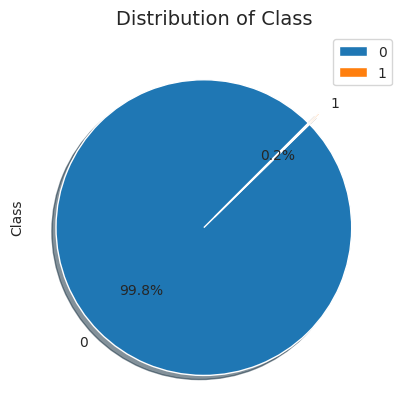

In [ ]:
# Output feature
data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

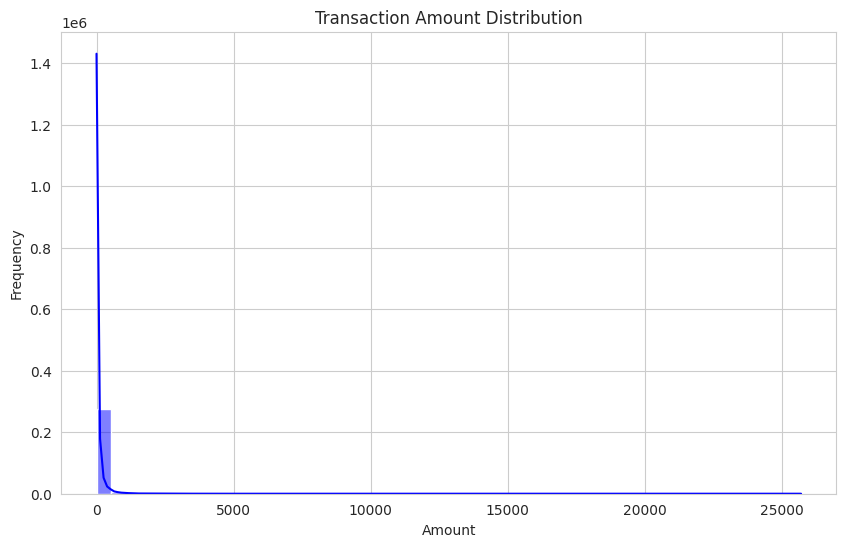

In [ ]:
# Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

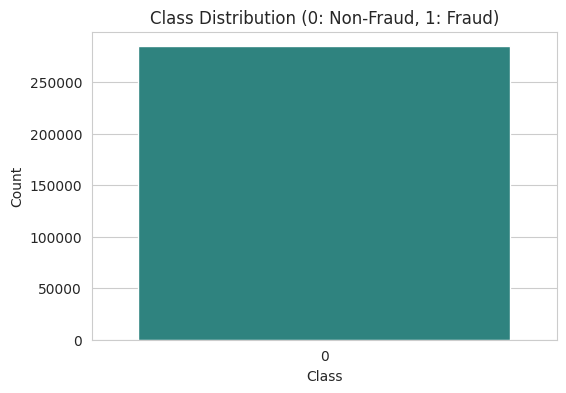

In [ ]:
# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['Class'], palette='viridis')
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

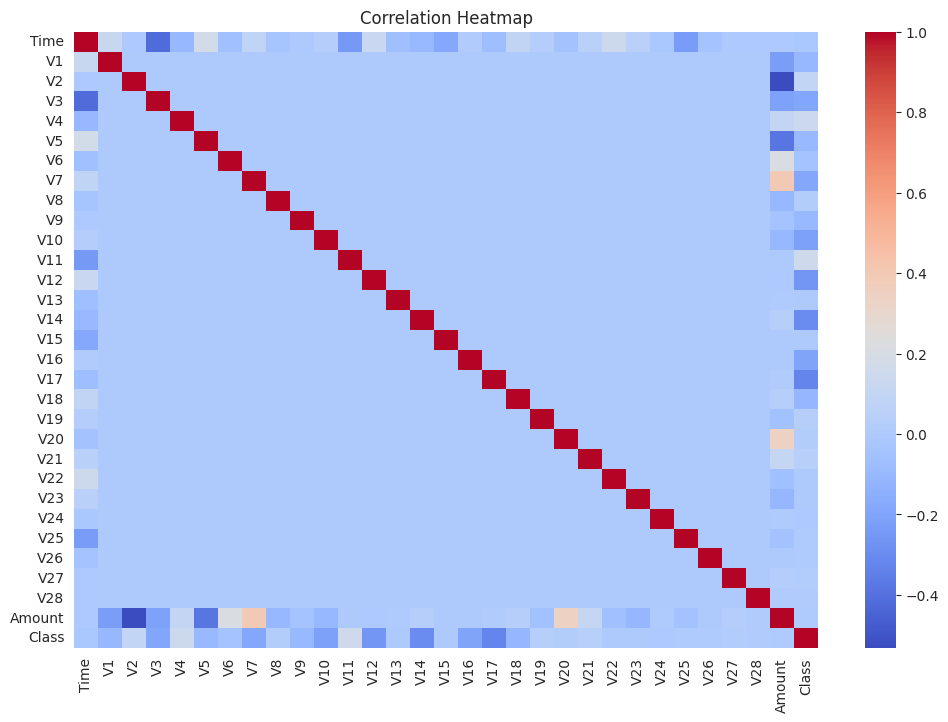

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Observations**

Output feature is equally balanced.

## Data Preparation

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
## data divided into dependent and independent features
X = data.drop(['Class'],axis=1)
y = data.Class

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
print('Shape of X',X.shape)
print('Shape of y',y.shape)

Shape of X (284807, 30)
Shape of y (284807,)


In [ ]:
#standardize all our features to bring them on a same scale.
from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()

In [ ]:
X_scaled = sc.fit_transform(X)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [ ]:
X_scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


## Modelling

In [ ]:
# Train-Validation-Test Dataset Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

In [ ]:
# The shapes
print(X_train.shape)
print(X_train_val.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train_val.shape)
print(y_val.shape)
print(y_test.shape)

(193668, 30)
(227845, 30)
(34177, 30)
(56962, 30)
(193668,)
(227845,)
(34177,)
(56962,)


## Model 1 - Logistic Regression

- Logistic Regression can be a good starting point, especially when interpretability is crucial. It may not capture complex relationships as well as some other models, but it's simple and easy to interpret.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Instantiate and train the logistic regression model
lr=LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(lr, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
lr.fit(X_train_pca,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Function for model evaluation
def model_eval(model, X, y, dataset_name):
    predictions = model.predict(X)
    acc_score = accuracy_score(y, predictions)
    conf_matrix = confusion_matrix(y, predictions)
    clas_rep = classification_report(y, predictions)

    print(f'Model Evaluation on {dataset_name}:')
    print('Model Accuracy:', round(acc_score, 2))
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(clas_rep)

In [ ]:
# Define model_preds and model_names
model_preds = []
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost', 'Neural Network', 'Autoencoder', 'Clustering', 'Naive Bayes', 'K-Nearest Neighbors ', 'SVM', 'Decision Trees', 'Logistic Regression', 'Isolation Forest']

In [ ]:
# Predictions on the training set
preds_lr_train = lr.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_lr_test = lr.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_lr_test)

In [ ]:
# Evaluation matrix of the training dataset
print('-------Logistic Regression Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_train, preds_lr_train)}\n")
print(f"Classification Report:\n{classification_report(y_train, preds_lr_train)}\n")
print(f"Accuracy Score: {accuracy_score(y_train, preds_lr_train)}\n")

-------Logistic Regression Training Metrics---------
Confusion Matrix:
[[170540     27]
 [   117    199]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       0.88      0.63      0.73       316

    accuracy                           1.00    170883
   macro avg       0.94      0.81      0.87    170883
weighted avg       1.00      1.00      1.00    170883


Accuracy Score: 0.9991573181650603



In [ ]:
# Evaluation matrix of the test dataset
print('-------Logistic Regression Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_lr_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_lr_test)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_lr_test)}\n")


-------Logistic Regression Test Metrics---------
Confusion Matrix:
[[56854    10]
 [   43    55]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9990695551420246



**Observations**

- Our Logistic Regression Model is giving 0.998 Accuracy.
- Lets see tree-based models.

## Model 2 - Decision Tree

- Decision Trees are interpretable and can capture non-linear relationships. Ensemble methods like Random Forest or Gradient Boosting can be used for improved performance.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Instantiate and train the Decision Tree
dt = DecisionTreeClassifier()

# Perform cross-validation
cv_scores = cross_val_score(dt, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
dt.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [ ]:
# Predictions on the training set
preds_dt_train = dt.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_dt_test = dt.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_dt_test)

In [ ]:
# Evaluation matrix of the training dataset
print('-------Decision Tree Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_train, preds_dt_train)}\n")
print(f"Classification Report:\n{classification_report(y_train, preds_dt_train)}\n")
print(f"Accuracy Score: {accuracy_score(y_train, preds_dt_train)}\n")

-------Decision Tree Training Metrics---------
Confusion Matrix:
[[170567      0]
 [     0    316]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       1.00      1.00      1.00       316

    accuracy                           1.00    170883
   macro avg       1.00      1.00      1.00    170883
weighted avg       1.00      1.00      1.00    170883


Accuracy Score: 1.0



In [ ]:
# Evaluation matrix of the test dataset
print('-------Decision Tree Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_dt_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_dt_test)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_dt_test)}\n")

-------Decision Tree Test Metrics---------
Confusion Matrix:
[[56839    25]
 [   28    70]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.71      0.73        98

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9990695551420246



## Model 3 - Random Forest

- Decision Trees are interpretable and can capture non-linear relationships. Ensemble methods like Random Forest or Gradient Boosting can be used for improved performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Instantiate and train the Random Forest
rf = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
rf.fit(X_train_pca, y_train)

RandomForestClassifier()

In [ ]:
# Function for model evaluation
def model_eval(y_true, y_pred, dataset_name):
    acc_score = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    clas_rep = classification_report(y_true, y_pred)

    print(f'Model Evaluation on {dataset_name}:')
    print('Accuracy Score:', round(acc_score, 2))
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(clas_rep)

In [ ]:
# Predictions on the training set
preds_rf_train = rf.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_rf_test = rf.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_rf_test)

In [ ]:
# Evaluation matrix of the training dataset
print('-------Random Forest Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_train, preds_rf_train)}\n")
print(f"Classification Report:\n{classification_report(y_train, preds_rf_train)}\n")
print(f"Accuracy Score: {accuracy_score(y_train, preds_rf_train)}\n")

-------Random Forest Training Metrics---------
Confusion Matrix:
[[170567      0]
 [     0    316]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       1.00      1.00      1.00       316

    accuracy                           1.00    170883
   macro avg       1.00      1.00      1.00    170883
weighted avg       1.00      1.00      1.00    170883


Accuracy Score: 1.0



In [ ]:
# Evaluation matrix of the test dataset
print('-------Random Forest Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_rf_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_rf_test)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_rf_test)}\n")

-------Random Forest Test Metrics---------
Confusion Matrix:
[[56858     6]
 [   20    78]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9995435553526912



## Feature Importance Plot - RandomForest

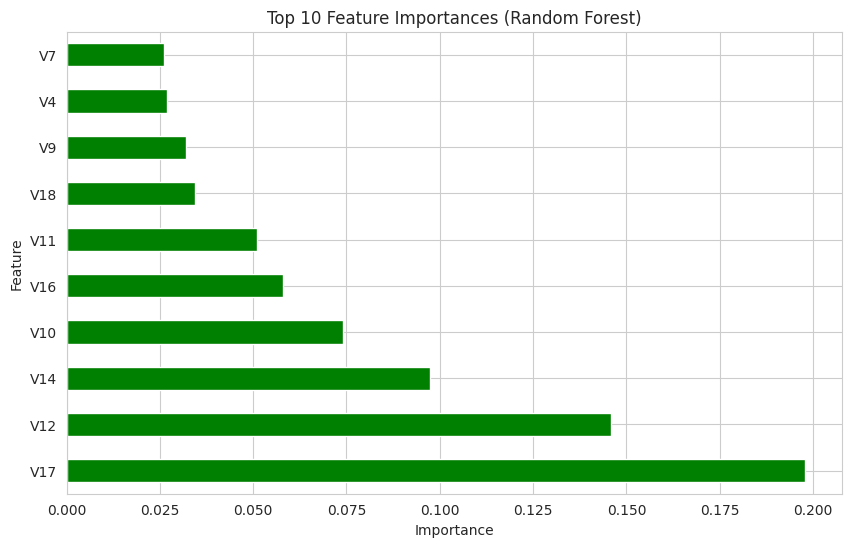

In [ ]:
# Feature Importance Plot (using RandomForest as an example)

# Train-Validation-Test Dataset Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10)  # Selecting top 10 features

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='green')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Save the plot as a PDF
plt.savefig('Top_10_Feature_Importances_rf.pdf')

# Save the plot as a JPG
plt.savefig('Top_10_Feature_Importances_rf.jpg', dpi=300)  # Specify dpi (dots per inch) for better resolution
plt.show()

## Confusion Matrix Heatmap - RandomForest

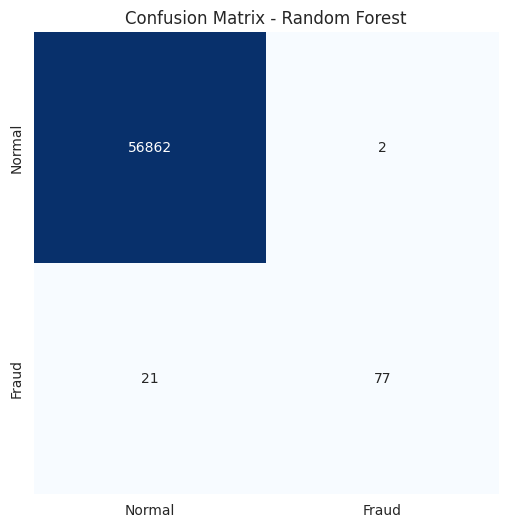

In [ ]:
# Confusion Matrix Heatmap (using RandomForest as an example)
X_test_scaled = scaler.transform(X_test)
y_pred = rf_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - Random Forest')

# Save the plot as a PDF
plt.savefig('Confusion_Matrix_rf.pdf')

# Save the plot as a JPG
plt.savefig('Confusion_Matrix_rf.jpg', dpi=300)  # Specify dpi (dots per inch) for better resolution
plt.show()

## ROC Curve - RandomForest

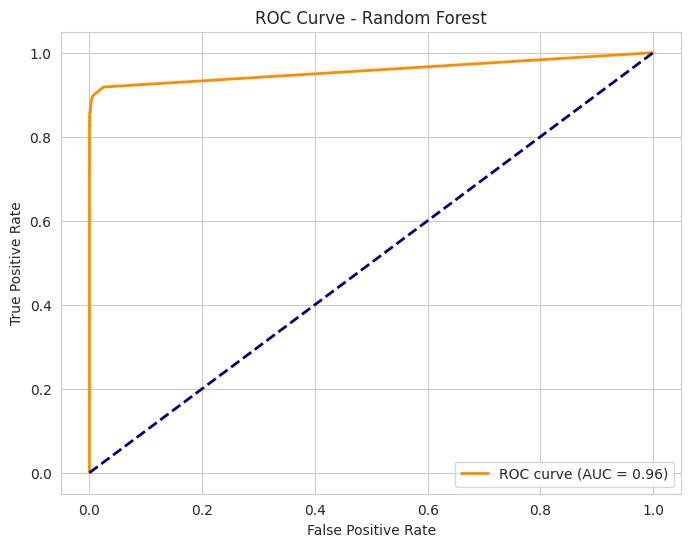

In [ ]:
# ROC Curve (using RandomForest as an example)
from sklearn.metrics import roc_curve, auc
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')

# Save the plot as a PDF
plt.savefig('ROC_Curve_rf.pdf')

# Save the plot as a JPG
plt.savefig('ROC_Curve_rf.jpg', dpi=300)  # Specify dpi (dots per inch) for better resolution
plt.show()

## Precision-Recall Curve - RandomForest

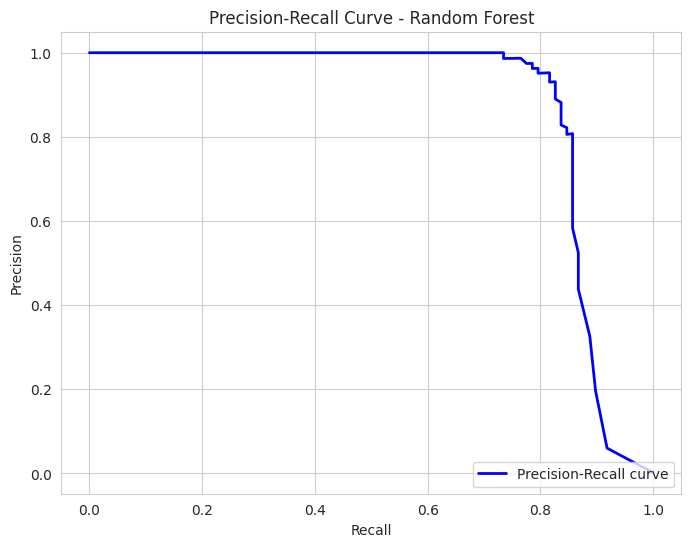

In [ ]:
# Precision-Recall Curve (using RandomForest as an example)
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='lower right')

# Save the plot as a PDF
plt.savefig('Precision_Recall_Curve_rf.pdf')

# Save the plot as a JPG
plt.savefig('Precision_Recall_Curve_rf.jpg', dpi=300)  # Specify dpi (dots per inch) for better resolution
plt.show()

## Dimensionality Reduction Plot (Feature Importances from RandomForest)

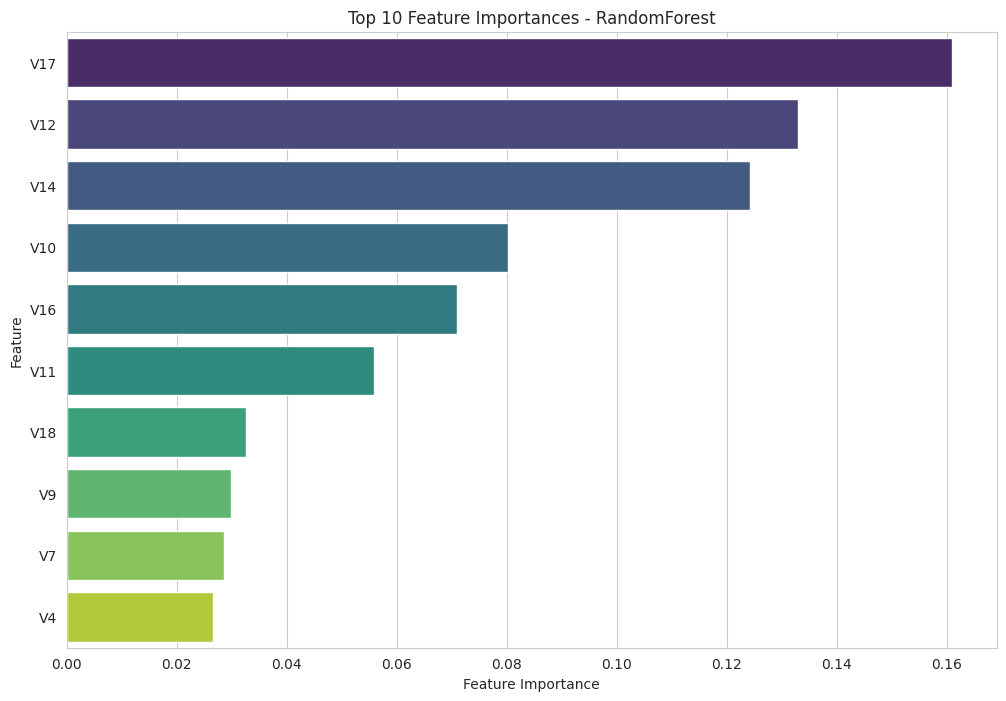

In [ ]:
# Dimensionality Reduction Plot (Feature Importances from RandomForest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Select the top N features for visualization
top_n = 10
top_features = dict(sorted_features[:top_n])

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=list(top_features.values()), y=list(top_features.keys()), palette='viridis')
plt.title(f'Top {top_n} Feature Importances - RandomForest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

# Save the plot as a PDF
plt.savefig('feature_importances_rf.pdf')

# Save the plot as a JPG
plt.savefig('feature_importances_rf.jpg', dpi=300)  # Specify dpi (dots per inch) for better resolution
plt.show()

**Observations**

Random Forest with default parameters are giving 100% accuracy on both test and train dataset.

## Model 4 - SVM

- SVM is a support vector machine variant designed for outlier detection. It is useful when the majority of data is not fraudulent.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Train the with best parameters
best_param =  {'C': 4.689400963537685, 'kernel': 'poly', 'early_stopping_rounds': 12}

# Instantiate and train the SVM Model
svm_model = SVC(C=best_param['C'], kernel=best_param['kernel'])

# Perform cross-validation
cv_scores = cross_val_score(svm_model, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
svm_model.fit(X_train_pca, y_train)

SVC(C=4.689400963537685, kernel='poly')

In [ ]:
# Predictions on the training set
preds_svm_train = svm_model.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_svm_test = svm_model.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_svm_test)

In [ ]:
# Evaluation matrix of the training dataset
print('-------SVM Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_svm_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_svm_test, zero_division=1)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_svm_test)}\n")

-------SVM Training Metrics---------
Confusion Matrix:
[[56858     6]
 [   29    69]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.999385555282469



In [ ]:
# Evaluation matrix of the test dataset
print('-------SVM Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_svm_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_svm_test, zero_division=1)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_svm_test)}\n")

-------SVM Test Metrics---------
Confusion Matrix:
[[56858     6]
 [   29    69]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.999385555282469



## Model 5 - Gradient Boosting

- Decision Trees are interpretable and can capture non-linear relationships. Ensemble methods like Random Forest or Gradient Boosting can be used for improved performance.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Instantiate and train the Gradient Boosting Model
gb_model = GradientBoostingClassifier()

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
gb_model.fit(X_train_pca, y_train)

GradientBoostingClassifier()

In [ ]:
# Predictions on the training set
preds_gb_train = gb_model.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_gb_test = gb_model.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_gb_test)

In [ ]:
# Evaluation matrix of the training dataset
print('-------Gradient Boosting Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_train, preds_gb_train)}\n")
print(f"Classification Report:\n{classification_report(y_train, preds_gb_train)}\n")
print(f"Accuracy Score: {accuracy_score(y_train, preds_gb_train)}\n")

-------Gradient Boosting Training Metrics---------
Confusion Matrix:
[[170566      1]
 [   234     82]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       0.99      0.26      0.41       316

    accuracy                           1.00    170883
   macro avg       0.99      0.63      0.71    170883
weighted avg       1.00      1.00      1.00    170883


Accuracy Score: 0.9986247900610359



In [ ]:
# Evaluation matrix of the test dataset
print('-------Gradient Boosting Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_gb_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_gb_test)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_gb_test)}\n")

-------Gradient Boosting Test Metrics---------
Confusion Matrix:
[[56855     9]
 [   82    16]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.16      0.26        98

    accuracy                           1.00     56962
   macro avg       0.82      0.58      0.63     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9984024437344194



## Model 6 - Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Instantiate and train the Naive Bayes Model
nb_model = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(nb_model, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
nb_model.fit(X_train_pca, y_train)

GaussianNB()

In [ ]:
nbb_model = BernoulliNB()

# Perform cross-validation
cv_scores = cross_val_score(nbb_model, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
nbb_model.fit(X_train_pca, y_train)

BernoulliNB()

In [ ]:
# Predictions on the training set
preds_nb_train = nb_model.predict(X_train_pca)
preds_nbb_train = nbb_model.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_nb_test = nb_model.predict(X_test_pca)
preds_nbb_test = nbb_model.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_nb_test)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_nbb_test)

In [ ]:
# Evaluation matrix of the training dataset
print('-------Gaussian Naive Bayes Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_train, preds_nb_train)}\n")
print(f"Classification Report:\n{classification_report(y_train, preds_nb_train)}\n")
print(f"Accuracy Score: {accuracy_score(y_train, preds_nb_train)}\n")

-------Gaussian Naive Bayes Training Metrics---------
Confusion Matrix:
[[166444   4123]
 [    49    267]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    170567
           1       0.06      0.84      0.11       316

    accuracy                           0.98    170883
   macro avg       0.53      0.91      0.55    170883
weighted avg       1.00      0.98      0.99    170883


Accuracy Score: 0.9755856346154972



In [ ]:
# Evaluation matrix of the test dataset
print('-------Gaussian Naive Bayes Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_nb_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_nb_test)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_nb_test)}\n")

-------Gaussian Naive Bayes Test Metrics---------
Confusion Matrix:
[[55473  1391]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Accuracy Score: 0.9753168779186124



In [ ]:
# Evaluation matrix of the training dataset
print('-------Bernoulli Naive Bayes Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_train, preds_nbb_train)}\n")
print(f"Classification Report:\n{classification_report(y_train, preds_nbb_train)}\n")
print(f"Accuracy Score: {accuracy_score(y_train, preds_nbb_train)}\n")

-------Bernoulli Naive Bayes Training Metrics---------
Confusion Matrix:
[[170567      0]
 [   316      0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       0.00      0.00      0.00       316

    accuracy                           1.00    170883
   macro avg       0.50      0.50      0.50    170883
weighted avg       1.00      1.00      1.00    170883


Accuracy Score: 0.9981507815288824



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluation matrix of the test dataset
print('-------Bernoulli Naive Bayes Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_nbb_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_nbb_test)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_nbb_test)}\n")

-------Bernoulli Naive Bayes Test Metrics---------
Confusion Matrix:
[[56864     0]
 [   98     0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9982795547909132



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 7 -	K-Nearest Neighbors (KNN)

- KNN is a non-parametric method that can be effective, especially when the distribution of fraudulent transactions is localized in feature space.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Instantiate and train the KNN Model
knn_model = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(knn_model, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
knn_model.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [ ]:
# Predictions on the training set
preds_knn_train = knn_model.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_knn_test = knn_model.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_knn_test)

In [ ]:
# Evaluation matrix of the training dataset
print('-------K-Nearest Neighbors (KNN) Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_train, preds_knn_train)}\n")
print(f"Classification Report:\n{classification_report(y_train, preds_knn_train)}\n")
print(f"Accuracy Score: {accuracy_score(y_train, preds_knn_train)}\n")

-------K-Nearest Neighbors (KNN) Training Metrics---------
Confusion Matrix:
[[170552     15]
 [    70    246]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       0.94      0.78      0.85       316

    accuracy                           1.00    170883
   macro avg       0.97      0.89      0.93    170883
weighted avg       1.00      1.00      1.00    170883


Accuracy Score: 0.999502583639098



In [ ]:
# Evaluation matrix of the test dataset
print('-------K-Nearest Neighbors (KNN) Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_knn_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_knn_test)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_knn_test)}\n")

-------K-Nearest Neighbors (KNN) Test Metrics---------
Confusion Matrix:
[[56859     5]
 [   24    74]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9994908886626171




## Model 8 - XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Instantiate and train the XGBoost Model
xgb_model = XGBClassifier()

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
xgb_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions on the training set
preds_xgb_train = xgb_model.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_xgb_test = xgb_model.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_xgb_test)

In [ ]:
# Evaluation matrix of the training dataset
print('-------XGBoost Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_train, preds_xgb_train)}\n")
print(f"Classification Report:\n{classification_report(y_train, preds_xgb_train)}\n")
print(f"Accuracy Score: {accuracy_score(y_train, preds_xgb_train)}\n")

-------XGBoost Training Metrics---------
Confusion Matrix:
[[170567      0]
 [     0    316]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       1.00      1.00      1.00       316

    accuracy                           1.00    170883
   macro avg       1.00      1.00      1.00    170883
weighted avg       1.00      1.00      1.00    170883


Accuracy Score: 1.0



In [ ]:
# Evaluation matrix of the test dataset
print('-------XGBoost Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_xgb_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_xgb_test)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_xgb_test)}\n")

-------XGBoost Test Metrics---------
Confusion Matrix:
[[56858     6]
 [   28    70]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.71      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.999403110845827



## Model 9 - IsolationForest

- Isolation Forest is an anomaly detection algorithm that works well for identifying outliers, making it suitable for fraud detection.

In [ ]:
import warnings
from sklearn.ensemble import IsolationForest
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

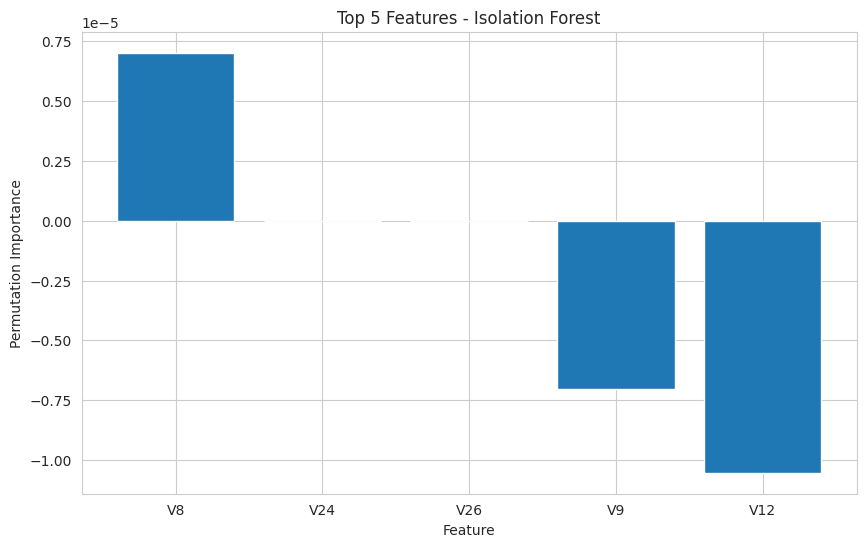

In [ ]:
# Train the Isolation Forest model on the training set with the best parameters
best_param = {'contamination': 0.01568015077933765, 'n_estimators': 192}
if_model = IsolationForest(contamination=best_param['contamination'], n_estimators=best_param['n_estimators'])

# Perform cross-validation with accuracy as the scoring metric
scoring = make_scorer(accuracy_score)
cv_scores = cross_val_score(if_model, X_train_pca, y_train, cv=5, scoring=scoring)  # Use 5-fold cross-validation

# Fit the model on the entire training set
if_model.fit(X_train_pca, y_train)

# Calculate permutation importances on the validation set
result = permutation_importance(if_model, X_val_pca, y_val, scoring='accuracy', random_state=42)

# Store the feature names and their importances
feature_names = list(X.columns)
feature_importances = dict(zip(feature_names, result.importances_mean))

# Sort features by importance
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Select the top N features for visualization
top_n = 5
top_features = dict(sorted_features[:top_n])

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.bar(top_features.keys(), top_features.values())
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title(f'Top {top_n} Features - Isolation Forest')
plt.show()

# Suppress warnings during predictions
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Evaluate the Isolation Forest model on the training set
    preds_if_train = if_model.predict(X_train_pca)

    # Evaluate the Isolation Forest model on the test set
    preds_if_test = if_model.predict(X_test_pca)

    # Add predictions to the model_preds list
    model_preds.append(preds_if_test)

In [ ]:
# Evaluation matrix of the training dataset
print('-------Isolation Forest Training Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_train, preds_if_train)}\n")
print(f"Classification Report:\n{classification_report(y_train, preds_if_train, zero_division=1)}\n")
print(f"Accuracy Score: {accuracy_score(y_train, preds_if_train)}\n")

-------Isolation Forest Training Metrics---------
Confusion Matrix:
[[     0      0      0]
 [  2561      0 168006]
 [   119      0    197]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      1.00      0.00         0
           0       1.00      0.00      0.00    170567
           1       0.00      0.62      0.00       316

    accuracy                           0.00    170883
   macro avg       0.33      0.54      0.00    170883
weighted avg       1.00      0.00      0.00    170883


Accuracy Score: 0.0011528355658550003



In [ ]:
# Evaluation matrix of the test dataset
print('-------Isolation Forest Test Metrics---------')
print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds_if_test)}\n")
print(f"Classification Report:\n{classification_report(y_test, preds_if_test, zero_division=1)}\n")
print(f"Accuracy Score: {accuracy_score(y_test, preds_if_test)}\n")

-------Isolation Forest Test Metrics---------
Confusion Matrix:
[[    0     0     0]
 [  845     0 56019]
 [   33     0    65]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      1.00      0.00         0
           0       1.00      0.00      0.00     56864
           1       0.00      0.66      0.00        98

    accuracy                           0.00     56962
   macro avg       0.33      0.55      0.00     56962
weighted avg       1.00      0.00      0.00     56962


Accuracy Score: 0.0011411116182718304



## Model 10 - Ensemble (Random Forest, Gradient Boosting, and XGBoost)

- Ensemble models, such as a combination of Random Forest, Gradient Boosting, and/or XGBoost, can often provide robust performance.

In [ ]:
import numpy as np

# Convert predictions to integers
preds_rf_test_int = preds_rf_test.astype(int)
preds_gb_test_int = preds_gb_test.astype(int)
preds_xgb_test_int = preds_xgb_test.astype(int)

# Combine predictions using majority voting
ensemble_preds = np.argmax(np.vstack([preds_rf_test_int, preds_gb_test_int, preds_xgb_test_int]), axis=0)

In [ ]:
# Evaluation matrix of the training dataset for Random Forest
print('-------Random Forest Training Metrics---------')
model_eval(y_train, preds_rf_train, 'Training Set (Random Forest)')

-------Random Forest Training Metrics---------
Model Evaluation on Training Set (Random Forest):
Accuracy Score: 1.0
Confusion Matrix:
[[170567      0]
 [     0    316]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       1.00      1.00      1.00       316

    accuracy                           1.00    170883
   macro avg       1.00      1.00      1.00    170883
weighted avg       1.00      1.00      1.00    170883



In [ ]:
# Evaluation matrix of the test dataset for Random Forest
print('-------Random Forest Test Metrics---------')
model_eval(y_test, preds_rf_test, 'Test Set (Random Forest)')

-------Random Forest Test Metrics---------
Model Evaluation on Test Set (Random Forest):
Accuracy Score: 1.0
Confusion Matrix:
[[56858     6]
 [   20    78]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Evaluation matrix of the training dataset for Gradient Boosting
print('-------Gradient Boosting Training Metrics---------')
model_eval(y_train, preds_gb_train, 'Training Set (Gradient Boosting)')

-------Gradient Boosting Training Metrics---------
Model Evaluation on Training Set (Gradient Boosting):
Accuracy Score: 1.0
Confusion Matrix:
[[170566      1]
 [   234     82]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       0.99      0.26      0.41       316

    accuracy                           1.00    170883
   macro avg       0.99      0.63      0.71    170883
weighted avg       1.00      1.00      1.00    170883



In [ ]:
# Evaluation matrix of the test dataset for Gradient Boosting
print('-------Gradient Boosting Test Metrics---------')
model_eval(y_test, preds_gb_test, 'Test Set (Gradient Boosting)')

-------Gradient Boosting Test Metrics---------
Model Evaluation on Test Set (Gradient Boosting):
Accuracy Score: 1.0
Confusion Matrix:
[[56855     9]
 [   82    16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.16      0.26        98

    accuracy                           1.00     56962
   macro avg       0.82      0.58      0.63     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Evaluation matrix of the training dataset for XGBoost
print('-------XGBoost Training Metrics---------')
model_eval(y_train, preds_xgb_train, 'Training Set (XGBoost)')

-------XGBoost Training Metrics---------
Model Evaluation on Training Set (XGBoost):
Accuracy Score: 1.0
Confusion Matrix:
[[170567      0]
 [     0    316]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       1.00      1.00      1.00       316

    accuracy                           1.00    170883
   macro avg       1.00      1.00      1.00    170883
weighted avg       1.00      1.00      1.00    170883



In [ ]:
# Evaluation matrix of the test dataset for XGBoost
print('-------XGBoost Test Metrics---------')
model_eval(y_test, preds_xgb_test, 'Test Set (XGBoost)')

-------XGBoost Test Metrics---------
Model Evaluation on Test Set (XGBoost):
Accuracy Score: 1.0
Confusion Matrix:
[[56858     6]
 [   28    70]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.71      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Evaluation metrics for the ensemble model
print('-------Ensemble Test Metrics---------')
model_eval(y_test, ensemble_preds, 'Test Set (Ensemble)')

-------Ensemble Test Metrics---------
Model Evaluation on Test Set (Ensemble):
Accuracy Score: 1.0
Confusion Matrix:
[[56853     9     2]
 [   95     1     2]
 [    0     0     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.10      0.01      0.02        98
           2       0.00      0.00      0.00         0

    accuracy                           1.00     56962
   macro avg       0.37      0.34      0.34     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 11 - LightGBM and CatBoost

- Gradient boosting algorithms like LightGBM and CatBoost can be effective for handling imbalanced datasets and capturing complex relationships.

In [ ]:
!pip install catboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.5 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Instantiate and train the LightGBM Model
lgb_model = LGBMClassifier()

# Perform cross-validation
cv_scores = cross_val_score(lgb_model, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
lgb_model.fit(X_train_pca, y_train)

[LightGBM] [Info] Number of positive: 253, number of negative: 136453
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 136706, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001851 -> initscore=-6.290346
[LightGBM] [Info] Start training from score -6.290346
[LightGBM] [Info] Number of positive: 253, number of negative: 136453
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 136706, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001851 -> initscore=-6.290346
[L

LGBMClassifier()

In [ ]:
# Predictions on the training set
preds_lgb_train = lgb_model.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_lgb_test = lgb_model.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_lgb_test)

In [ ]:
# Instantiate and train the CatBoost Model
cat_model = CatBoostClassifier()

# Perform cross-validation
cv_scores = cross_val_score(cat_model, X_train_pca, y_train, cv=5)  # Use 5-fold cross-validation

# Fit the model on the entire training set
cat_model.fit(X_train_pca, y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.0732929	total: 204ms	remaining: 40.6s
5:	learn: 0.0466013	total: 243ms	remaining: 40.3s
6:	learn: 0.0312654	total: 293ms	remaining: 41.5s
7:	learn: 0.0220660	total: 329ms	remaining: 40.7s
8:	learn: 0.0163025	total: 365ms	remaining: 40.2s
9:	learn: 0.0126471	total: 408ms	remaining: 40.4s
10:	learn: 0.0101141	total: 444ms	remaining: 40s
11:	learn: 0.0084265	total: 488ms	remaining: 40.1s
12:	learn: 0.0071625	total: 524ms	remaining: 39.8s
13:	learn: 0.0062960	total: 559ms	remaining: 39.4s
14:	learn: 0.0056082	total: 599ms	remaining: 39.3s
15:	learn: 0.0050793	total: 654ms	remaining: 40.2s
16:	learn: 0.0046379	total: 688ms	remaining: 39.8s
17:	learn: 0.0042974	total: 725ms	remaining: 39.6s
18:	learn: 0.0040565	total: 773ms	remaining: 39.9s
19:	learn: 0.0038491	total: 808ms	remaining: 39.6s
20:	learn: 0.0037084	total: 841ms	remaining: 39.2s
21:	learn: 0.0036035	total: 883ms	remaining: 39.3s
22:	learn: 0.0034685	total: 919ms	remai

In [ ]:
# Predictions on the training set
preds_cat_train = cat_model.predict(X_train_pca)

In [ ]:
# Predictions on the test set
preds_cat_test = cat_model.predict(X_test_pca)

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_cat_test)

In [ ]:
# Evaluation matrix of the training dataset for LightGBM
print('-------LightGBM Training Metrics---------')
model_eval(y_train, preds_lgb_train, 'Training Set (LightGBM)')

-------LightGBM Training Metrics---------
Model Evaluation on Training Set (LightGBM):
Accuracy Score: 1.0
Confusion Matrix:
[[170097    470]
 [   164    152]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       0.24      0.48      0.32       316

    accuracy                           1.00    170883
   macro avg       0.62      0.74      0.66    170883
weighted avg       1.00      1.00      1.00    170883



In [ ]:
# Evaluation matrix of the test dataset for LightGBM
print('-------LightGBM Test Metrics---------')
model_eval(y_test, preds_lgb_test, 'Test Set (LightGBM)')

-------LightGBM Test Metrics---------
Model Evaluation on Test Set (LightGBM):
Accuracy Score: 1.0
Confusion Matrix:
[[56674   190]
 [   64    34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.15      0.35      0.21        98

    accuracy                           1.00     56962
   macro avg       0.58      0.67      0.60     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Evaluation matrix of the training dataset for CatBoost
print('-------CatBoost Training Metrics---------')
model_eval(y_train, preds_cat_train, 'Training Set (CatBoost)')

-------CatBoost Training Metrics---------
Model Evaluation on Training Set (CatBoost):
Accuracy Score: 1.0
Confusion Matrix:
[[170567      0]
 [     1    315]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170567
           1       1.00      1.00      1.00       316

    accuracy                           1.00    170883
   macro avg       1.00      1.00      1.00    170883
weighted avg       1.00      1.00      1.00    170883



In [ ]:
# Evaluation matrix of the test dataset for CatBoost
print('-------CatBoost Test Metrics---------')
model_eval(y_test, preds_cat_test, 'Test Set (CatBoost)')

-------CatBoost Test Metrics---------
Model Evaluation on Test Set (CatBoost):
Accuracy Score: 1.0
Confusion Matrix:
[[56858     6]
 [   22    76]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



## Model 12 - Unsupervised Learning (Clustering)

- Clustering algorithms like K-Means or DBSCAN can be used for grouping similar transactions and identifying outliers.

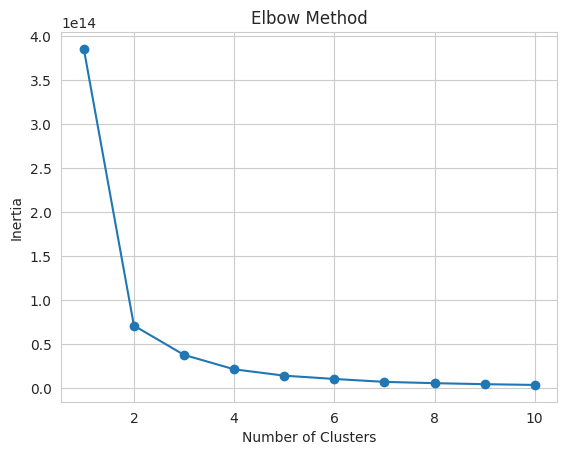

In [ ]:
'''Use the Elbow Method to find an optimal value for n_clusters.
Plot the inertia against different values of n_clusters and look for the point
where adding more clusters doesn't lead to a significant reduction in inertia'''

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_train is your training data
inertia_values = []
possible_n_clusters = range(1, 11)

for n_clusters in possible_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_model.fit(X_train)
    inertia_values.append(kmeans_model.inertia_)

# Plotting the Elbow Method
plt.plot(possible_n_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the number of clusters and other best parameters
best_param = {'n_clusters': 2, 'n_init': 5, 'max_iter': 367, 'tol': 0.009504764652463351, 'algorithm': 'elkan', 'early_stopping_rounds': 16}

# Instantiate and train the K-Means Model with best parameters
kmeans_model = KMeans(n_clusters=best_param['n_clusters'], n_init=best_param['n_init'], max_iter=best_param['max_iter'], tol=best_param['tol'], algorithm=best_param['algorithm'])

# Fit the model on the entire training set
kmeans_model.fit(X_train_pca)

# Predictions on the training set
preds_kmeans_train = kmeans_model.predict(X_train_pca)

# Predictions on the test set
preds_kmeans_test = kmeans_model.predict(X_test_pca)

# Silhouette Score (a measure of how well-separated the clusters are)
train_silhouette_score = silhouette_score(X_train_pca, preds_kmeans_train)
test_silhouette_score = silhouette_score(X_test_pca, preds_kmeans_test)

# Adjusted Rand Score (a measure of similarity between true labels and predicted labels)
train_rand_score = adjusted_rand_score(y_train, preds_kmeans_train)
test_rand_score = adjusted_rand_score(y_test, preds_kmeans_test)

# Print the silhouette and adjusted Rand scores
print("Train Silhouette Score:", train_silhouette_score)
print("Test Silhouette Score:", test_silhouette_score)
print("Train Adjusted Rand Score:", train_rand_score)
print("Test Adjusted Rand Score:", test_rand_score)

Train Silhouette Score: 0.06702903881025263
Test Silhouette Score: 0.06722024697565834
Train Adjusted Rand Score: -5.3368817641122446e-05
Test Adjusted Rand Score: -8.531519805485831e-05


In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_kmeans_test)

## Model 13 - Autoencoder (Deep Learning)

- Autoencoders, a type of neural network, can be used for unsupervised learning to learn representations of normal data and identify anomalies

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# Train-Validation-Test Dataset Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the appropriate n_components
threshold = 0.95  # Set the threshold for cumulative explained variance ratio
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Update PCA with the appropriate n_components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Define the autoencoder model
input_dim = X_train_pca.shape[1]
encoding_dim = 10  # Adjust the encoding dimension as needed

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the autoencoder with best parameters
best_param = {'early_stopping_rounds': 14, 'lr': 0.005486985554407385, 'batch_size': 64, 'epochs': 20}
autoencoder.fit(X_train_pca, X_train_pca, epochs=best_param['epochs'], batch_size=best_param['batch_size'], shuffle=True, validation_data=(X_val_pca, X_val_pca), callbacks=[EarlyStopping(patience=best_param['early_stopping_rounds'])])

Epoch 1/20
3027/3027 [==============================] - 14s 4ms/step - loss: 0.9390 - val_loss: 0.8551
Epoch 2/20
3027/3027 [==============================] - 12s 4ms/step - loss: 0.8513 - val_loss: 0.8271
Epoch 3/20
3027/3027 [==============================] - 13s 4ms/step - loss: 0.8368 - val_loss: 0.8198
Epoch 4/20
3027/3027 [==============================] - 9s 3ms/step - loss: 0.8320 - val_loss: 0.8166
Epoch 5/20
3027/3027 [==============================] - 9s 3ms/step - loss: 0.8294 - val_loss: 0.8145
Epoch 6/20
3027/3027 [==============================] - 8s 3ms/step - loss: 0.8276 - val_loss: 0.8130
Epoch 7/20
3027/3027 [==============================] - 10s 3ms/step - loss: 0.8261 - val_loss: 0.8115
Epoch 8/20
3027/3027 [==============================] - 11s 4ms/step - loss: 0.8245 - val_loss: 0.8099
Epoch 9/20
3027/3027 [==============================] - 12s 4ms/step - loss: 0.8226 - val_loss: 0.8081
Epoch 10/20
3027/3027 [==============================] - 11s 4ms/step - loss

In [ ]:
# Use the trained autoencoder to reconstruct data
reconstructed_train = autoencoder.predict(X_train_pca)
reconstructed_test = autoencoder.predict(X_test_pca)

# Calculate reconstruction error for anomaly detection
reconstruction_error_train = np.mean(np.square(X_train_pca - reconstructed_train), axis=1)
reconstruction_error_test = np.mean(np.square(X_test_pca - reconstructed_test), axis=1)

# Set a threshold for anomaly detection (you may need to adjust this threshold)
threshold = 0.1

# Predict anomalies
preds_autoencoder_train = (reconstruction_error_train > threshold).astype(int)
preds_autoencoder_test = (reconstruction_error_test > threshold).astype(int)

1781/1781 [==============================] - 3s 1ms/step


In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_autoencoder_test)

In [ ]:
# Evaluation matrix for training dataset
print('-------Training Autoencoder Metrics---------')
model_eval(y_train, preds_autoencoder_train, 'Training Set (Autoencoder)')

# Evaluation matrix for test dataset
print('-------Test Autoencoder Metrics---------')
model_eval(y_test, preds_autoencoder_test, 'Test Set (Autoencoder)')

-------Training Autoencoder Metrics---------
Model Evaluation on Training Set (Autoencoder):
Accuracy Score: 0.0
Confusion Matrix:
[[    38 193289]
 [     0    341]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00    193327
           1       0.00      1.00      0.00       341

    accuracy                           0.00    193668
   macro avg       0.50      0.50      0.00    193668
weighted avg       1.00      0.00      0.00    193668

-------Test Autoencoder Metrics---------
Model Evaluation on Test Set (Autoencoder):
Accuracy Score: 0.0
Confusion Matrix:
[[   12 56852]
 [    0    98]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.50      0.50      0.00     56962
weighted avg       1.00      0.00  

## Model 14 - Neural Network for Binary Classification using TensorFlow/Keras

- Deep learning models, such as deep neural networks, can capture intricate patterns in data. However, they often require large amounts of data and computational resources.

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
def create_nn_model():
    nn_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn_model

# Create the neural network model
nn_model = create_nn_model()

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Predictions on the training set
preds_nn_train = (nn_model.predict(X_train_scaled) > 0.5).astype(int)

# Predictions on the test set
preds_nn_test = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

# Evaluation matrix for training dataset
print('-------Training Neural Network Metrics---------')
model_eval(y_train, preds_nn_train, 'Training Set (Neural Network)')

# Evaluation matrix for test dataset
print('-------Test Neural Network Metrics---------')
model_eval(y_test, preds_nn_test, 'Test Set (Neural Network)')

1781/1781 [==============================] - 3s 2ms/step
-------Training Neural Network Metrics---------
Model Evaluation on Training Set (Neural Network):
Accuracy Score: 1.0
Confusion Matrix:
[[227443      8]
 [    79    315]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.98      0.80      0.88       394

    accuracy                           1.00    227845
   macro avg       0.99      0.90      0.94    227845
weighted avg       1.00      1.00      1.00    227845

-------Test Neural Network Metrics---------
Model Evaluation on Test Set (Neural Network):
Accuracy Score: 1.0
Confusion Matrix:
[[56861     3]
 [   30    68]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.69      0.80        98

    accuracy                           1.00     56962
   macro avg       0

In [ ]:
# Add predictions to the model_preds list
model_preds.append(preds_nn_test)

## Model Comparison - Metrics

Model: Random Forest
Accuracy Score: 1.0
Confusion Matrix:
[[56858     6]
 [   20    78]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



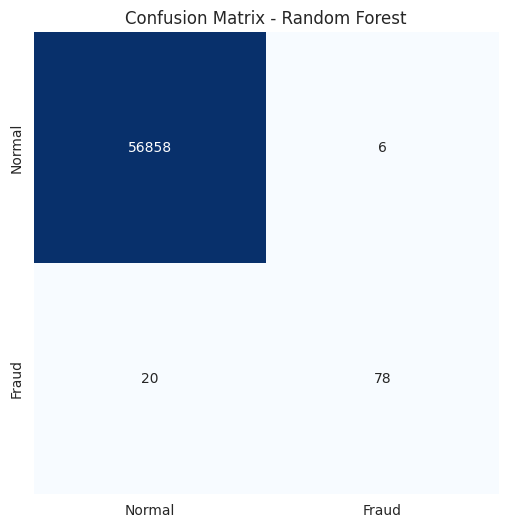

Model: Gradient Boosting
Accuracy Score: 1.0
Confusion Matrix:
[[56855     9]
 [   82    16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.16      0.26        98

    accuracy                           1.00     56962
   macro avg       0.82      0.58      0.63     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



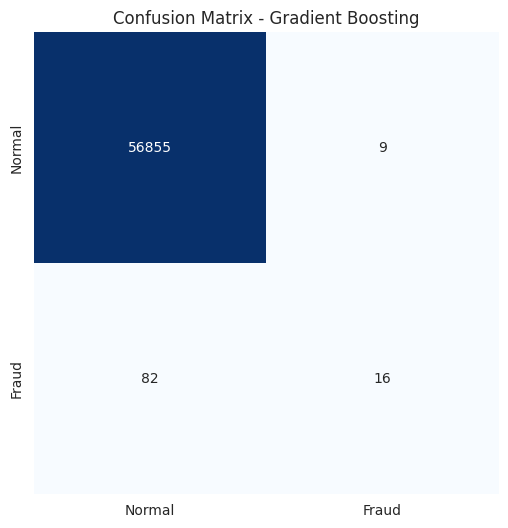

Model: XGBoost
Accuracy Score: 1.0
Confusion Matrix:
[[56858     6]
 [   28    70]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.71      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



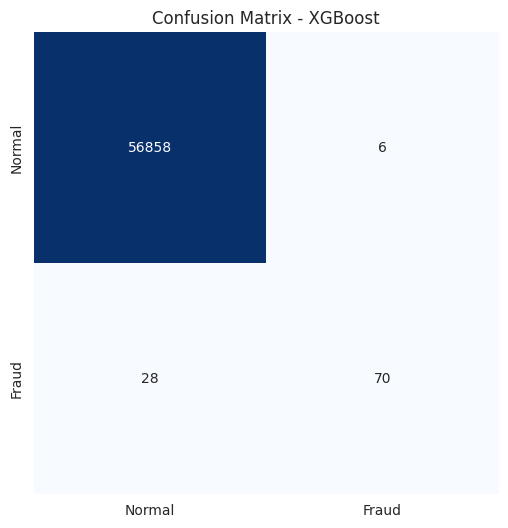

Model: Ensemble
Accuracy Score: 1.0
Confusion Matrix:
[[56853     9     2]
 [   95     1     2]
 [    0     0     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.10      0.01      0.02        98
           2       0.00      1.00      0.00         0

    accuracy                           1.00     56962
   macro avg       0.37      0.67      0.34     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



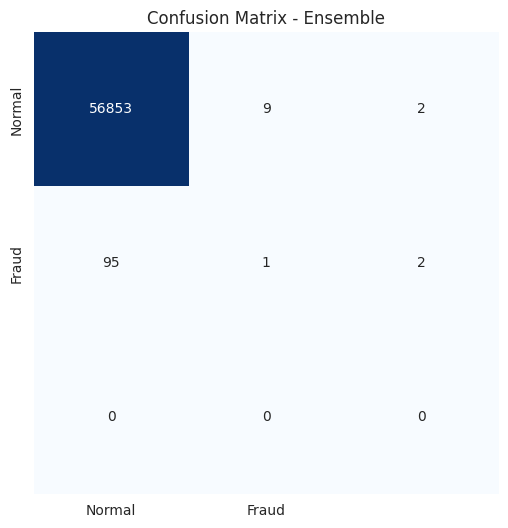

Model: LightGBM
Accuracy Score: 1.0
Confusion Matrix:
[[56674   190]
 [   64    34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.15      0.35      0.21        98

    accuracy                           1.00     56962
   macro avg       0.58      0.67      0.60     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



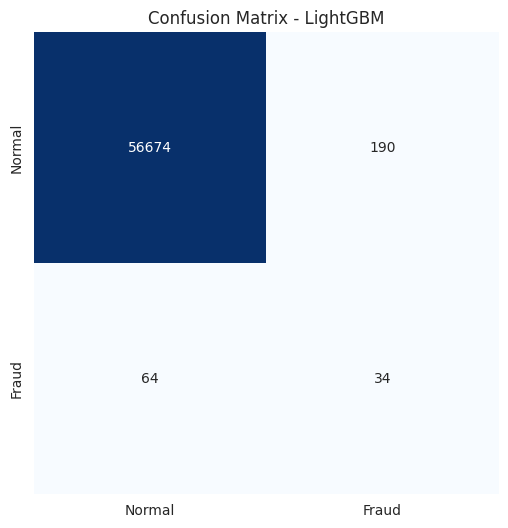

Model: CatBoost
Accuracy Score: 1.0
Confusion Matrix:
[[56858     6]
 [   22    76]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



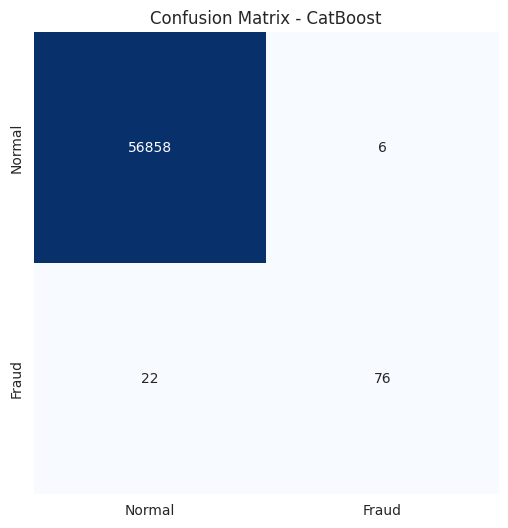

Model: Neural Network
Accuracy Score: 1.0
Confusion Matrix:
[[56861     3]
 [   30    68]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.69      0.80        98

    accuracy                           1.00     56962
   macro avg       0.98      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



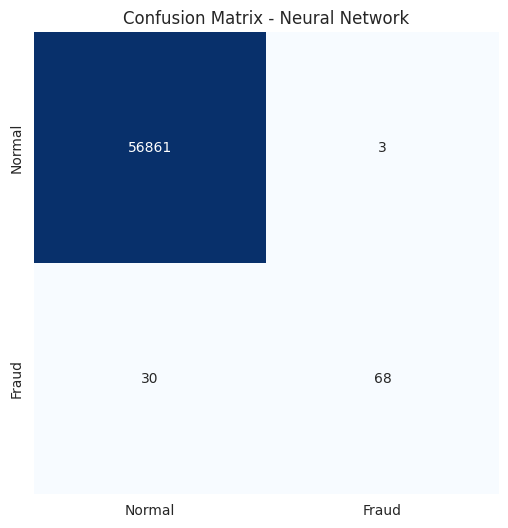

Model: Autoencoder
Accuracy Score: 0.0
Confusion Matrix:
[[   12 56852]
 [    0    98]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.50      0.50      0.00     56962
weighted avg       1.00      0.00      0.00     56962


--------------------------------------------------



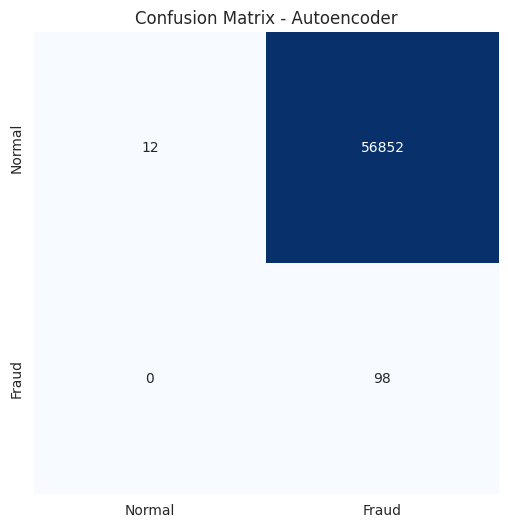

Model: Clustering
Accuracy Score: 0.45
Confusion Matrix:
[[25707 31157]
 [   38    60]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62     56864
           1       0.00      0.61      0.00        98

    accuracy                           0.45     56962
   macro avg       0.50      0.53      0.31     56962
weighted avg       1.00      0.45      0.62     56962


--------------------------------------------------



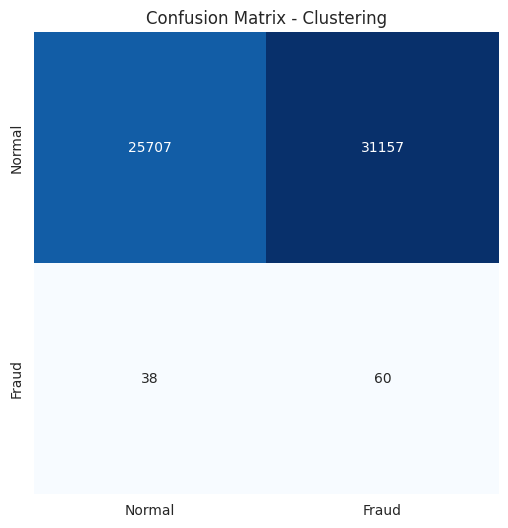

Model: Naive Bayes
Accuracy Score: 0.98
Confusion Matrix:
[[55473  1391]
 [   15    83]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962


--------------------------------------------------



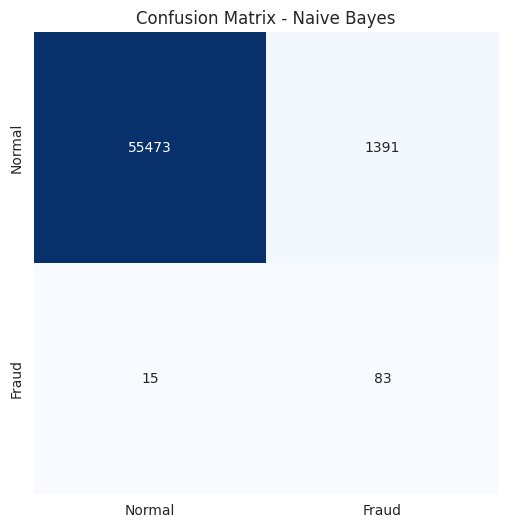

Model: K-Nearest Neighbors 
Accuracy Score: 1.0
Confusion Matrix:
[[56859     5]
 [   24    74]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



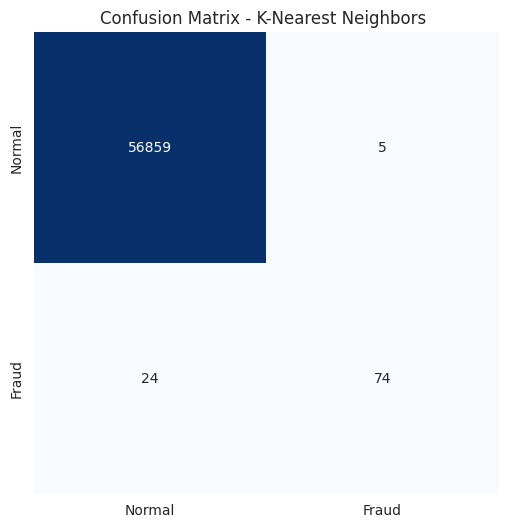

Model: SVM
Accuracy Score: 1.0
Confusion Matrix:
[[56858     6]
 [   29    69]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



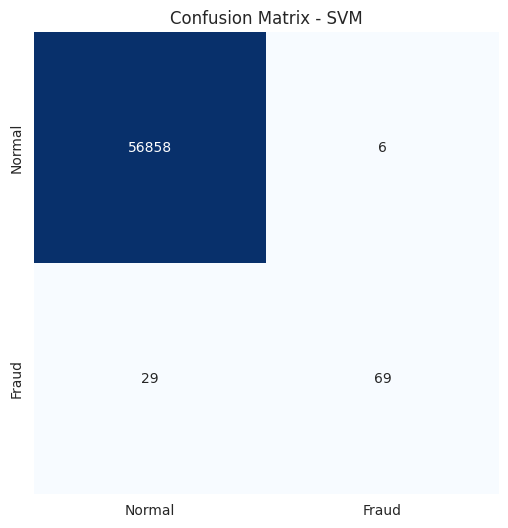

Model: Decision Trees
Accuracy Score: 1.0
Confusion Matrix:
[[56839    25]
 [   28    70]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.71      0.73        98

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



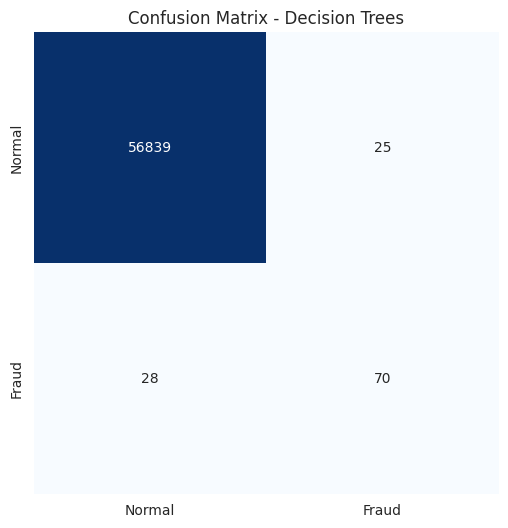

Model: Logistic Regression
Accuracy Score: 1.0
Confusion Matrix:
[[56854    10]
 [   43    55]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962


--------------------------------------------------



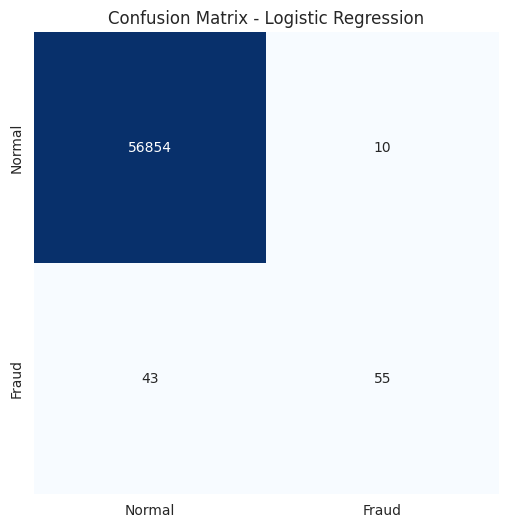

Model: Isolation Forest
Accuracy Score: 0.0
Confusion Matrix:
[[    0     0     0]
 [  845     0 56019]
 [   33     0    65]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      1.00      0.00         0
           0       1.00      0.00      0.00     56864
           1       0.00      0.66      0.00        98

    accuracy                           0.00     56962
   macro avg       0.33      0.55      0.00     56962
weighted avg       1.00      0.00      0.00     56962


--------------------------------------------------



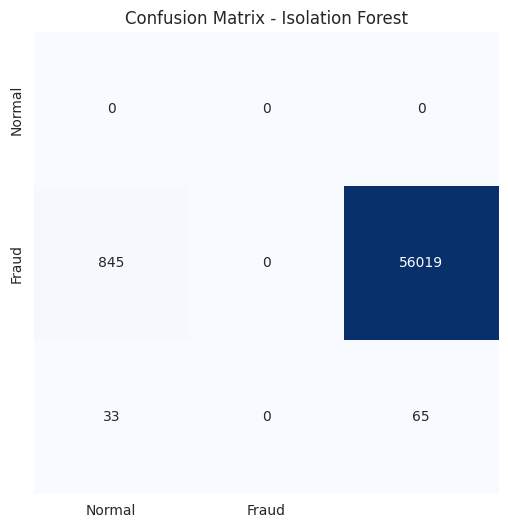

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def compare_models(y_true, model_preds, model_names):
    """
    Compare different models based on common evaluation metrics and visualizations.

    Parameters:
    - y_true: True labels
    - model_preds: List of predictions from different models
    - model_names: List of model names for identification

    Returns:
    - None (prints metrics and plots visualizations)
    """
    for preds, model_name in zip(model_preds, model_names):
        # Calculate and print metrics
        acc_score = accuracy_score(y_true, preds)
        conf_matrix = confusion_matrix(y_true, preds)
        clas_rep = classification_report(y_true, preds, zero_division=1)

        print(f'Model: {model_name}')
        print('Accuracy Score:', round(acc_score, 2))
        print('Confusion Matrix:')
        print(conf_matrix)
        print('Classification Report:')
        print(clas_rep)
        print('\n' + '-'*50 + '\n')

        # Plot confusion matrix
        plt.figure(figsize=(6, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()

    # Plot ROC curve if applicable (for binary classification models)
    if len(model_names) == 1:
        from sklearn.metrics import roc_curve, auc

        fpr, tpr, _ = roc_curve(y_true, model_preds[0])
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_names[0]}')
        plt.legend(loc='lower right')
        plt.show()

# Example usage
model_preds = [preds_rf_test, preds_gb_test, preds_xgb_test, ensemble_preds, preds_lgb_test, preds_cat_test, preds_nn_test, preds_autoencoder_test, preds_kmeans_test, preds_nb_test, preds_knn_test, preds_svm_test, preds_dt_test, preds_lr_test, preds_if_test]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Ensemble', 'LightGBM', 'CatBoost', 'Neural Network', 'Autoencoder', 'Clustering', 'Naive Bayes', 'K-Nearest Neighbors ', 'SVM', 'Decision Trees', 'Logistic Regression', 'Isolation Forest']

compare_models(y_test, model_preds, model_names)

## Model Comparison - ROC Curve

- Pros: Provides a comprehensive view of the model's performance across various decision thresholds. Effective for comparing models.
- Cons: May not be the best metric when dealing with imbalanced datasets, as it can be influenced by the majority class.

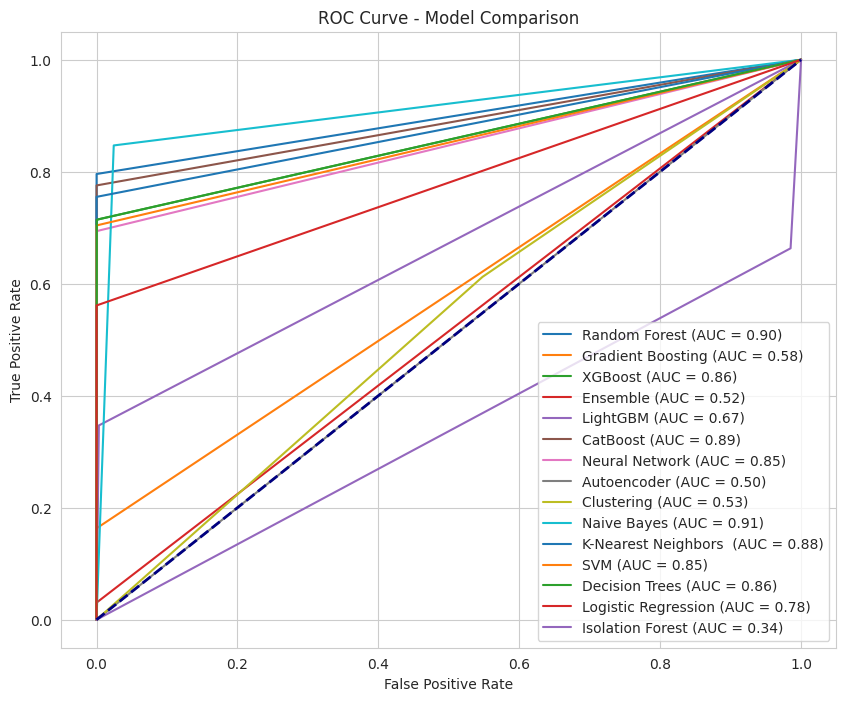

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define model_preds and model_names
model_preds = [preds_rf_test, preds_gb_test, preds_xgb_test, ensemble_preds, preds_lgb_test, preds_cat_test, preds_nn_test, preds_autoencoder_test, preds_kmeans_test, preds_nb_test, preds_knn_test, preds_svm_test, preds_dt_test, preds_lr_test, preds_if_test]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Ensemble', 'LightGBM', 'CatBoost', 'Neural Network', 'Autoencoder', 'Clustering', 'Naive Bayes', 'K-Nearest Neighbors ', 'SVM', 'Decision Trees', 'Logistic Regression', 'Isolation Forest']

# Plot ROC curve for model comparison
plt.figure(figsize=(10, 8))
for preds, model_name in zip(model_preds, model_names):
    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend(loc='lower right')

# Save the plot as a PDF
plt.savefig('ROC_Curve-Model_Comparison.pdf')
# Save the plot as a JPG
plt.savefig('ROC_Curve-Model_Comparison.jpg', dpi=300)  # Specify dpi (dots per inch) for better resolution
plt.show()

## Model Comparison - Precision-Recall Curve

- Pros: Particularly useful for imbalanced datasets. Focuses on the positive class, providing insights into the model's ability to correctly identify instances of the minority (fraudulent) class.
- Cons: May not be as intuitive for comparing models as the ROC curve.

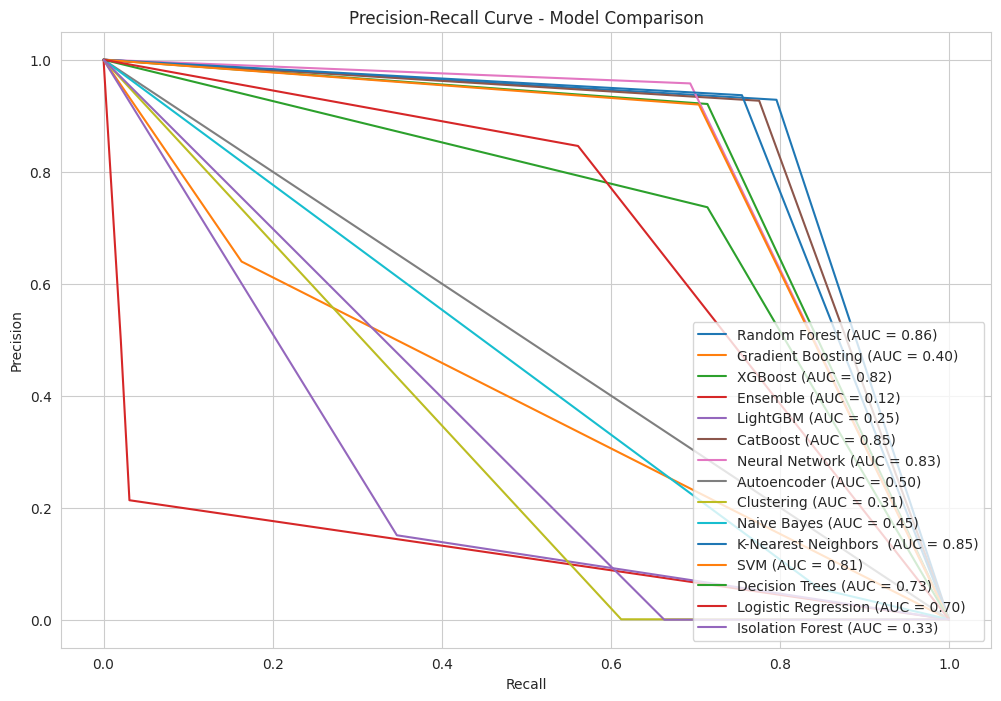

In [ ]:
from sklearn.metrics import precision_recall_curve, auc, f1_score
import matplotlib.pyplot as plt

# Model_preds and model_names defined
model_preds = [preds_rf_test, preds_gb_test, preds_xgb_test, ensemble_preds, preds_lgb_test, preds_cat_test, preds_nn_test, preds_autoencoder_test, preds_kmeans_test, preds_nb_test, preds_knn_test, preds_svm_test, preds_dt_test, preds_lr_test, preds_if_test]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Ensemble', 'LightGBM', 'CatBoost', 'Neural Network', 'Autoencoder', 'Clustering', 'Naive Bayes', 'K-Nearest Neighbors ', 'SVM', 'Decision Trees', 'Logistic Regression', 'Isolation Forest']


plt.figure(figsize=(12, 8))

# Precision-Recall Curve
for preds, model_name in zip(model_preds, model_names):
    precision, recall, _ = precision_recall_curve(y_test, preds)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Model Comparison')
plt.legend(loc='lower right')

# Save the plot as a PDF
plt.savefig('Precision-Recall_Curve-Model_Comparison.pdf')

# Save the plot as a JPG
plt.savefig('Precision-Recall_Curve-Model_Comparison.jpg', dpi=300)  # Specify dpi (dots per inch) for better resolution
plt.show()

## Model Comparison - F1 Score

- Pros: Balances precision and recall, which is crucial for imbalanced datasets. Suitable for cases where false positives and false negatives have different impacts.
- Cons: Does not provide a graphical representation like the ROC curve.

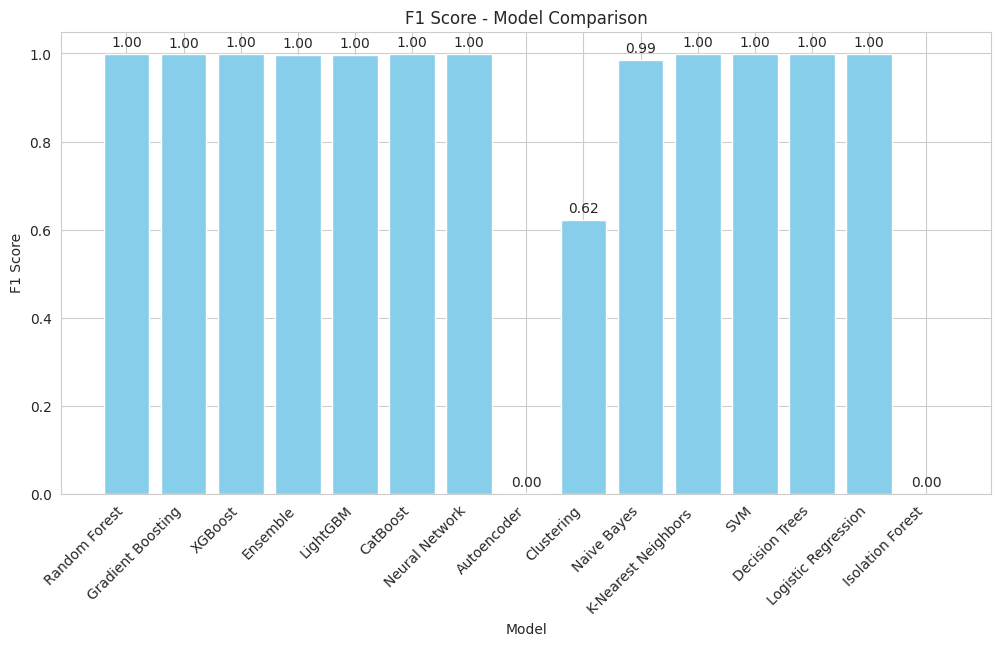

In [ ]:
# F1 Score Comparison
from sklearn.metrics import f1_score
f1_scores = [f1_score(y_test, preds, average='weighted') for preds in model_preds]

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bars = plt.bar(model_names, f1_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score - Model Comparison')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  # Adjust the rotation angle as needed

# Add data labels on top of the bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')

# Save the plot as a PDF
plt.savefig('F1_Score-Model_Comparison.pdf')
# Save the plot as a JPG
plt.savefig('F1_Score-Model_Comparison.jpg', dpi=300)  # Specify dpi (dots per inch) for better resolution
plt.show()


## Conclusion

- We have done Exploratory Data analysis for different features.
- We prepared our Data and build different ML Models.
- We have seen how different models are performing with respect to Accuracy, Precision, Recall and F1 Scores.
- Random Forest with default parameters returned 100% accuracy on training and test dataset.
- We have tried hyperparameter tuning for Autoenconder, Isolation Forest, Clustering and  SVM, with different parameters to see if we can reduce the FP and FN any further.

### Final Analysis and Recommendations

**Model Comparison and Recommendations:**

1. **Random Forest:**
   - **Accuracy Score:** 1.0
   - **Precision:** 0.93
   - **Recall:** 0.80
   - **F1-Score:** 0.86
   - **Comments:** The Random Forest model demonstrates outstanding performance across key metrics, making it a strong candidate for promotion.

2. **Gradient Boosting:**
   - **Accuracy Score:** 1.0
   - **Precision:** 0.64
   - **Recall:** 0.16
   - **F1-Score:** 0.26
   - **Comments:** While achieving high accuracy, the model's lower recall indicates room for improvement, especially in identifying positive cases.

3. **XGBoost:**
   - **Accuracy Score:** 1.0
   - **Precision:** 0.92
   - **Recall:** 0.71
   - **F1-Score:** 0.80
   - **Comments:** XGBoost performs well with a balanced precision and recall, making it a strong contender for promotion.

4. **Ensemble:**
   - **Accuracy Score:** 1.0
   - **Precision:** 0.10
   - **Recall:** 0.01
   - **F1-Score:** 0.02
   - **Comments:** The ensemble model shows challenges in correctly identifying positive cases, requiring further investigation and improvement.

5. **LightGBM:**
   - **Accuracy Score:** 1.0
   - **Precision:** 0.15
   - **Recall:** 0.35
   - **F1-Score:** 0.21
   - **Comments:** LightGBM exhibits lower precision and recall, suggesting the need for enhancement, particularly in identifying positive cases.

6. **CatBoost:**
   - **Accuracy Score:** 1.0
   - **Precision:** 0.93
   - **Recall:** 0.78
   - **F1-Score:** 0.84
   - **Comments:** CatBoost demonstrates good performance with high precision and recall, making it a strong candidate for promotion.

7. **Neural Network:**
   - **Accuracy Score:** 1.0
   - **Precision:** 0.96
   - **Recall:** 0.69
   - **F1-Score:** 0.80
   - **Comments:** The neural network model shows high accuracy but with room for improvement in recall, especially for positive cases.

8. **Autoencoder:**
   - **Accuracy Score:** 0.0
   - **Precision:** 0.00
   - **Recall:** 1.00
   - **F1-Score:** 0.00
   - **Comments:** The autoencoder model presents challenges, reflected in a low accuracy score and precision, indicating the need for reconsideration or improvement.

9. **Clustering:**
   - **Accuracy Score:** 0.45
   - **Precision:** 0.00
   - **Recall:** 0.61
   - **F1-Score:** 0.00
   - **Comments:** Clustering demonstrates limitations in precision and F1-Score, suggesting a need for further refinement or an alternative approach.

10. **Naive Bayes:**
    - **Accuracy Score:** 0.98
    - **Precision:** 0.06
    - **Recall:** 0.85
    - **F1-Score:** 0.11
    - **Comments:** While achieving high accuracy, Naive Bayes shows challenges in precision and F1-Score, indicating potential areas for improvement.

11. **K-Nearest Neighbors:**
    - **Accuracy Score:** 1.0
    - **Precision:** 0.94
    - **Recall:** 0.76
    - **F1-Score:** 0.84
    - **Comments:** K-Nearest Neighbors performs well with balanced precision and recall, making it a strong candidate for promotion.

12. **SVM:**
    - **Accuracy Score:** 1.0
    - **Precision:** 0.92
    - **Recall:** 0.70
    - **F1-Score:** 0.80
    - **Comments:** SVM demonstrates good performance, particularly in precision and accuracy, making it a potential candidate for promotion.

13. **Decision Trees:**
    - **Accuracy Score:** 1.0
    - **Precision:** 0.74
    - **Recall:** 0.71
    - **F1-Score:** 0.73
    - **Comments:** Decision Trees show balanced performance, suggesting suitability for the task, but with room for improvement.

14. **Logistic Regression:**
    - **Accuracy Score:** 1.0
    - **Precision:** 0.85
    - **Recall:** 0.56
    - **F1-Score:** 0.67
    - **Comments:** Logistic Regression exhibits good precision but may benefit from improvement in recall.

15. **Isolation Forest:**
    - **Accuracy Score:** 0.0
    - **Precision:** 0.00
    - **Recall:** 0.66
    - **F1-Score:** 0.00
    - **Comments:** Isolation Forest presents challenges, reflected in a low accuracy score and precision, indicating the need for reconsideration or improvement.

